#### Introduction

### Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

In [403]:
!pip install ipykernel

In [405]:
!pip install pymysql

In [431]:
pip install mysql_connector-python

In [407]:
import pymysql

In [415]:
from sqlalchemy import create_engine

In [51]:
import warnings
warnings.filterwarnings('ignore')
import math as m
import statistics as st
import scipy.stats as sts
from scipy.stats import norm
from scipy.stats import t

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.cluster import KMeans

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

### Data Merging

In [9]:
appearance=pd.read_excel('appearances.xlsx')
appearance

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,90
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,74
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
3563,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,77
3564,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,84
3565,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,90
3566,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,6


In [11]:
game_events=pd.read_excel('game_events.xlsx')
game_events

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,NaN
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",NaN,NaN
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,NaN
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,NaN
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",NaN,15077.0
...,...,...,...,...,...,...,...,...,...
1844,4acebccbc824e45d51045d8c5e164341,2023-10-31,4194147,3,Goals,355369,", Left-footed shot, 1. Tournament Goal Assist:...",NaN,284010.0
1845,159ad5633cf9d7c3a97b593efb6c3269,2023-10-31,4194147,9,Goals,355369,", Right-footed shot, 2. Tournament Goal Assist...",NaN,629588.0
1846,daa31f19aab26eec375884aef73c73b3,2023-10-31,4194147,65,Substitutions,355369,", Tactical",544148.0,NaN
1847,869a13060604e769290dafe0b1f14483,2023-11-01,4194152,70,Substitutions,504215,", Tactical",406640.0,NaN


In [13]:
game_lineup=pd.read_excel('game_lineups.xlsx')
game_lineup

,game_lineups_id,game_id,type,number,player_id,player_name,team_captain,position
0,f2570d1504fc02f4b6c7608e8dcf89a3,4087925,substitutes,34,242284,Ethan Horvath,0,Goalkeeper
1,f5f0da93ea8e1d8bdd799658e7c8f7cb,4087928,starting_lineup,13,145466,Tim Ream,0,Centre-Back
2,31a4d12ec23d604779d909d26c1b5410,4087929,substitutes,26,578539,Chris Richards,0,Centre-Back
3,776dcbef98651450db76723cb7e3b4df,4087935,substitutes,26,578539,Chris Richards,0,Centre-Back
4,6a35ef7495303f29e7f85dbd54547fb1,4087936,starting_lineup,13,145466,Tim Ream,1,Centre-Back
...,...,...,...,...,...,...,...,...
214,ec3d266094f99ca0a8847de827e37105,4194152,starting_lineup,7,504215,Giovanni Reyna,0,Right Winger
215,667840cda9bdf3b0344b8e99b306cf38,4194152,starting_lineup,23,124732,John Anthony Brooks,0,Centre-Back
216,1c5d2f60ee777760f8a757aa10c42bb1,4194154,starting_lineup,13,103064,Terrence Boyd,0,Centre-Forward
217,99032084fd00ffbfee52c541a9f960ab,4204000,substitutes,14,315762,Luca de la Torre,0,Central Midfield


In [15]:
games=pd.read_excel('games.xlsx')
games

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,3296153,NLP,2019,Round of 16,2020-01-22,7,0,NaN,NaN,Erik ten Hag,Eric Meijers,Johan Cruijff ArenA,52017.0,Richard Martens,NaN,NaN,AFC Ajax Amsterdam,NaN,07:00:00,domestic_cup
3264,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,Thomas Thomasberg,Right to Dream Park,2843.0,Michael Tykgaard,NaN,NaN,Football Club Nords,Hobro IK,03:02:00,domestic_league
3265,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,Marc Brys,Guldensporenstadion,6143.0,Wesley Alen,NaN,NaN,Koninklijke Voetbalclub Kortrijk,Koninklijke Sint-Truidense Voetbalvereniging,03:01:00,domestic_league
3266,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,Mark Hughes,Wembley Stadium,62202.0,Roger East,NaN,NaN,Tottenham Hotspur Football Club,Stoke City,05:01:00,domestic_league


In [17]:
players=pd.read_excel('players.xlsx')
players

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,273570,Desevio Payne,2020,1283,desevio-payne,United States,1995-11-30,Right-Back,Defender,right,182.0,NaN,400000.0,NaT,NaN
148,111783,Alejandro Bedoya,2015,995,alejandro-bedoya,United States,1987-04-29,Central Midfield,Midfield,right,182.0,300000.0,2500000.0,2023-12-31,YMU Group
149,160670,Joe Gyau,2014,16,joe-gyau,United States,1992-09-16,Left Winger,Attack,both,175.0,400000.0,600000.0,2023-12-31,BR Group Management
150,3476,Brad Friedel,2014,148,brad-friedel,United States,1971-05-18,Goalkeeper,Goalkeeper,NaN,NaN,NaN,4000000.0,NaT,NaN


In [19]:
players=players.rename(columns={'name':'player_name'})
players.columns

Index(['player_id', 'player_name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

In [21]:
g_df1=pd.merge(games,appearance,on='game_id',how='inner')
g_df1

,game_id,competition_id_x,season,round,date_x,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,appearance_id,player_id,date_y,player_name,competition_id_y,yellow_cards,red_cards,goals,assists,minutes_played
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,...,2222734_104203,104203,2012-12-07,Eugene Starikov,RU1,0,0,0,0,38
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,...,2224572_161244,161244,2012-07-28,Conor O'Brien,DK1,0,0,0,0,90
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,...,2224628_46472,46472,2013-03-08,Charlie Davies,DK1,0,0,0,0,18
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,...,2224655_39467,39467,2013-03-10,Clarence Goodson,DK1,0,0,0,0,90
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,...,2224729_39467,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,2875216_381187,381187,2017-12-10,Emmanuel Sabbi,DK1,0,0,0,0,8
3564,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,2875216_542776,542776,2017-12-10,Jonathan Amon,DK1,0,0,0,0,84
3565,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,...,3099247_411302,411302,2018-10-20,Brendan Hines-Ike,BE1,0,0,0,0,30
3566,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,...,2872273_31642,31642,2017-12-09,Geoff Cameron,GB1,0,0,0,0,15


In [23]:
g_df1=g_df1.rename(columns={'date_x':'date','competition_id_x':'competition_id'})
g_df1=g_df1.drop(['date_y','competition_id_y'],axis=1)
g_df1

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,aggregate,competition_type,appearance_id,player_id,player_name,yellow_cards,red_cards,goals,assists,minutes_played
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,...,02:03:00,domestic_league,2222734_104203,104203,Eugene Starikov,0,0,0,0,38
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,...,01:02:00,domestic_league,2224572_161244,161244,Conor O'Brien,0,0,0,0,90
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,...,02:00:00,domestic_league,2224628_46472,46472,Charlie Davies,0,0,0,0,18
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,...,00:03:00,domestic_league,2224655_39467,39467,Clarence Goodson,0,0,0,0,90
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,...,00:01:00,domestic_league,2224729_39467,39467,Clarence Goodson,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,03:02:00,domestic_league,2875216_381187,381187,Emmanuel Sabbi,0,0,0,0,8
3564,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,03:02:00,domestic_league,2875216_542776,542776,Jonathan Amon,0,0,0,0,84
3565,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,...,03:01:00,domestic_league,3099247_411302,411302,Brendan Hines-Ike,0,0,0,0,30
3566,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,...,05:01:00,domestic_league,2872273_31642,31642,Geoff Cameron,0,0,0,0,15


In [25]:
g_df2=pd.merge(g_df1,players,on='player_id',how='inner')
g_df2

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,...,UdSSR,1988-11-17,Centre-Forward,Attack,right,175.0,NaN,500000.0,NaT,Prosport
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,...,United States,1988-10-20,Defensive Midfield,Midfield,right,177.0,NaN,750000.0,NaT,NaN
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,...,United States,1986-06-25,Centre-Forward,Attack,right,178.0,NaN,2200000.0,NaT,NaN
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,...,United States,1982-05-17,Centre-Back,Defender,right,193.0,NaN,1850000.0,NaT,NaN
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,...,United States,1982-05-17,Centre-Back,Defender,right,193.0,NaN,1850000.0,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,Italy,1997-12-24,Right Winger,Attack,right,178.0,800000.0,1000000.0,2027-06-30,Avid Sports Group
3564,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,United States,1999-04-30,Left Winger,Attack,right,175.0,300000.0,700000.0,2024-06-30,NaN
3565,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,...,United States,1994-11-30,Centre-Back,Defender,right,185.0,800000.0,800000.0,2024-12-31,CAA Stellar
3566,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,...,United States,1985-07-11,Centre-Back,Defender,right,190.0,NaN,5000000.0,NaT,CMG Sports


In [27]:
g_df2=g_df2.rename(columns={'player_name_x':'player_name'})
g_df2=g_df2.drop('player_name_y',axis=1)
g_df2

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,...,UdSSR,1988-11-17,Centre-Forward,Attack,right,175.0,NaN,500000.0,NaT,Prosport
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,...,United States,1988-10-20,Defensive Midfield,Midfield,right,177.0,NaN,750000.0,NaT,NaN
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,...,United States,1986-06-25,Centre-Forward,Attack,right,178.0,NaN,2200000.0,NaT,NaN
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,...,United States,1982-05-17,Centre-Back,Defender,right,193.0,NaN,1850000.0,NaT,NaN
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,...,United States,1982-05-17,Centre-Back,Defender,right,193.0,NaN,1850000.0,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,Italy,1997-12-24,Right Winger,Attack,right,178.0,800000.0,1000000.0,2027-06-30,Avid Sports Group
3564,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,United States,1999-04-30,Left Winger,Attack,right,175.0,300000.0,700000.0,2024-06-30,NaN
3565,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,...,United States,1994-11-30,Centre-Back,Defender,right,185.0,800000.0,800000.0,2024-12-31,CAA Stellar
3566,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,...,United States,1985-07-11,Centre-Back,Defender,right,190.0,NaN,5000000.0,NaT,CMG Sports


In [29]:
g_df3=pd.merge(g_df2,game_events,on='game_id',how='inner')
g_df3

,game_id,competition_id,season,round,date_x,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,contract_expiration_date,agent_name,game_event_id,date_y,minute,type,player_id_y,description,player_in_id,player_assist_id
0,2224732,DK1,2012,1. Matchday,2012-07-14,6,1,1.0,12.0,Lars Sondergaard,...,NaT,NaN,d9f02a9d767f319e58909ba1e1de6d23,2012-07-14,50,Goals,161244,", Long distance kick, 1. Goal of the Season As...",NaN,NaN
1,2225471,GB1,2012,4. Matchday,2012-09-15,2,0,14.0,5.0,Paul Lambert,...,2023-12-31,YMU Group,bec21e402284c604b204b08f0d47d0a3,2012-09-15,80,Cards,61575,"2. Yellow card , Foul",NaN,NaN
2,2225471,GB1,2012,4. Matchday,2012-09-15,2,0,14.0,5.0,Paul Lambert,...,NaT,Unique Sports Group,bec21e402284c604b204b08f0d47d0a3,2012-09-15,80,Cards,61575,"2. Yellow card , Foul",NaN,NaN
3,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,2025-06-30,NaN,c903649b4b8d30635f339aa5602ae14b,2012-11-17,52,Cards,49723,"3. Yellow card , Foul",NaN,NaN
4,2231518,L1,2012,17. Matchday,2012-12-16,1,1,12.0,14.0,Thomas Schaaf,...,2025-06-30,NaN,f6851ceef0a8f0093298f74104596dce,2012-12-16,84,Cards,49723,"4. Yellow card , Foul",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,2421967,FAC,2013,Fourth Round,2014-01-26,1,0,NaN,NaN,Jose Mourinho,...,NaT,CMG Sports,cc94987a2e925d6a2fef232a85222f1d,2014-01-26,32,Cards,31642,"1. Yellow card , Foul",NaN,NaN
1335,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,2027-06-30,Avid Sports Group,237567d50f0a3d2c545dc4776a8321f6,2017-12-10,84,Substitutions,542776,NaN,148343.0,NaN
1336,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,2024-06-30,NaN,237567d50f0a3d2c545dc4776a8321f6,2017-12-10,84,Substitutions,542776,NaN,148343.0,NaN
1337,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,...,2024-12-31,CAA Stellar,d3e7898d2f3e2ee405a0caa5e23ad4fb,2018-10-20,30,Substitutions,411302,NaN,204347.0,NaN


In [31]:
g_df3=g_df3.rename(columns={'date_x':'date','player_id_x':'player_id'})
g_df3=g_df3.drop(['date_y','player_id_y'],axis=1)
g_df3.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'appearance_id',
       'player_id', 'player_name', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'game_event_id', 'minute', 'type', 'description', 'player_in_id',
       'player_assist_id'],
      dtype='object')

In [33]:
df_c=pd.merge(g_df3,game_lineup,how='inner',on='player_id')
df_c

,game_id_x,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,description,player_in_id,player_assist_id,game_lineups_id,game_id_y,type_y,number,player_name_y,team_captain,position_y
0,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,"3. Yellow card , Foul",NaN,NaN,8d717b1017e72d89d2ee1112bb2d7466,4096025,substitutes,22,Timothy Chandler,0,Right-Back
1,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,"3. Yellow card , Foul",NaN,NaN,d53eb3fd74523d6dd4536653c145ae96,4096042,substitutes,22,Timothy Chandler,0,Right-Back
2,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,"3. Yellow card , Foul",NaN,NaN,3efc21c645e46b2f411bcdb1710aa444,4096061,substitutes,22,Timothy Chandler,0,Right-Back
3,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,"3. Yellow card , Foul",NaN,NaN,cc79e78c570ce19872dfed125d324407,4162615,substitutes,22,Timothy Chandler,0,Right-Back
4,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,"3. Yellow card , Foul",NaN,NaN,21de58902f547e231bf2604be9fa996f,4162639,substitutes,22,Timothy Chandler,0,Right-Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,NaN,148343.0,NaN,6cfe64023dc5dde10d30a425a7d16478,4090221,starting_lineup,17,Jonathan Amon,0,Left Winger
4195,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,NaN,148343.0,NaN,b98267b3d4d1d410e2f1c6fe77edc03b,4090229,starting_lineup,17,Jonathan Amon,0,Centre-Forward
4196,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,NaN,148343.0,NaN,4181ae3842513237a340485fffb8aa64,4157241,starting_lineup,17,Jonathan Amon,0,Right Midfield
4197,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,NaN,148343.0,NaN,60f259a693d6801befb2f40fb99b4b3e,4180928,substitutes,17,Jonathan Amon,0,Left Winger


In [35]:
df_c=df_c.rename(columns={'game_id_x':'game_id','player_name_x':'player_name','position_x':'field_position','position_y':'in_position','type_x':'event_type','type_y':'lineup/sub'})
df_c=df_c.drop(['game_id_y','player_name_y'],axis=1)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   game_id                      4199 non-null   int64         
 1   competition_id               4199 non-null   object        
 2   season                       4199 non-null   int64         
 3   round                        4199 non-null   object        
 4   date                         4199 non-null   datetime64[ns]
 5   home_club_goals              4199 non-null   int64         
 6   away_club_goals              4199 non-null   int64         
 7   home_club_position           3481 non-null   float64       
 8   away_club_position           3481 non-null   float64       
 9   home_club_manager_name       4199 non-null   object        
 10  away_club_manager_name       4199 non-null   object        
 11  stadium                      4199 non-null 

In [37]:
test=pd.read_excel('test data.xlsx')
test

,Unnamed: 0,appearance_id,game_id,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,4197,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,Luca de la Torre,0,Right Midfield
1,4198,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,99032084fd00ffbfee52c541a9f960ab,substitutes,14,Luca de la Torre,0,Central Midfield


In [39]:
test=test.rename(columns={'position_x':'field_position','position_y':'in_position','type_x':'event_type','type_y':'lineup/sub'})
test=test.drop(['Unnamed: 0','name'],axis=1)

In [41]:
df_c=pd.concat([df_c,test],axis=0)
df_c

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,minute,event_type,description,player_in_id,player_assist_id,game_lineups_id,lineup/sub,number,team_captain,in_position
0,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,52,Cards,"3. Yellow card , Foul",NaN,NaN,8d717b1017e72d89d2ee1112bb2d7466,substitutes,22,0,Right-Back
1,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,52,Cards,"3. Yellow card , Foul",NaN,NaN,d53eb3fd74523d6dd4536653c145ae96,substitutes,22,0,Right-Back
2,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,52,Cards,"3. Yellow card , Foul",NaN,NaN,3efc21c645e46b2f411bcdb1710aa444,substitutes,22,0,Right-Back
3,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,52,Cards,"3. Yellow card , Foul",NaN,NaN,cc79e78c570ce19872dfed125d324407,substitutes,22,0,Right-Back
4,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,52,Cards,"3. Yellow card , Foul",NaN,NaN,21de58902f547e231bf2604be9fa996f,substitutes,22,0,Right-Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,84,Substitutions,NaN,148343.0,NaN,4181ae3842513237a340485fffb8aa64,starting_lineup,17,0,Right Midfield
4197,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,84,Substitutions,NaN,148343.0,NaN,60f259a693d6801befb2f40fb99b4b3e,substitutes,17,0,Left Winger
4198,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,84,Substitutions,NaN,148343.0,NaN,907cccfbd635208a95140967eb013744,starting_lineup,17,0,Centre-Forward
0,3450613,NL1,2020,2. Matchday,2020-09-20,4,0,8.0,10.0,Adrie Koster,...,58,Substitutions,NaN,446247.0,NaN,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,0,Right Midfield


### Data Cleaning

#### i) Drop irrelevant columns

In [43]:
col_to_drop=['home_club_formation','away_club_formation','player_assist_id','description','player_in_id','agent_name']
df=df_c.drop(col_to_drop,axis=1)
df.isnull().sum()

game_id                          0
competition_id                   0
season                           0
round                            0
date                             0
home_club_goals                  0
away_club_goals                  0
home_club_position             718
away_club_position             718
home_club_manager_name           0
away_club_manager_name           0
stadium                          0
attendance                     396
referee                         32
home_club_name                 209
away_club_name                  22
aggregate                        0
competition_type                 0
appearance_id                    0
player_id                        0
player_name                      0
yellow_cards                     0
red_cards                        0
goals                            0
assists                          0
minutes_played                   0
last_season                      0
current_club_id                  0
player_code         

#### ii) Missing value treatment

In [45]:
num=['home_club_position','away_club_position','attendance','market_value_in_eur']
for nm in num:
    df[nm]=df[nm].fillna(df[nm].mean())

cat=['home_club_name','away_club_name','referee','contract_expiration_date']
for ct in cat:
    df[ct]=df[ct].fillna(df[ct].mode()[0])

In [445]:
df.isnull().sum()

game_id                           0
competition_id                    0
season                            0
round                             0
date                              0
home_club_goals                   0
away_club_goals                   0
home_club_position                0
away_club_position                0
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                        0
referee                           0
home_club_name                    0
away_club_name                    0
aggregate                         0
competition_type                  0
appearance_id                     0
player_id                         0
player_name                       0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
last_season                       0
current_club_id             

#### iii) Column 'Age' creation

In [47]:
x=2025-(df['date_of_birth'].dt.year)
df['Age']=x

#### iv) Outlier Analysis

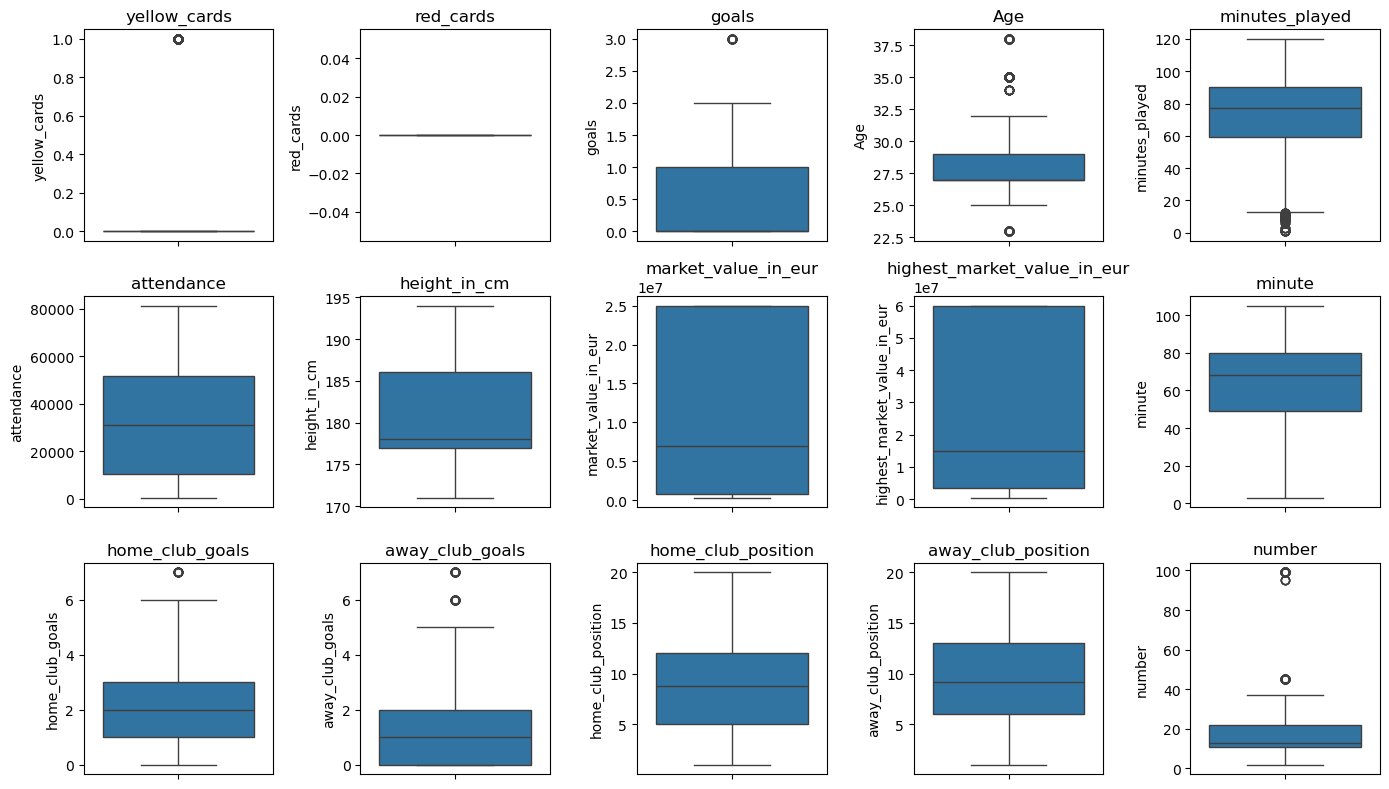

In [339]:
out=['yellow_cards','red_cards','goals','Age','minutes_played','attendance','height_in_cm','market_value_in_eur','highest_market_value_in_eur','minute','home_club_goals','away_club_goals','home_club_position','away_club_position','number']
k=0
fig,ax=plt.subplots(3,5,figsize=(14,8),tight_layout=True)
for i in range(0,3):
    for j in range(0,5):
        sns.boxplot(df[out[k]],ax=ax[i,j])
        ax[i,j].set_title(out[k])
        k=k+1

plt.show()

In [53]:
# Winsorisation
ser=pd.Series(df['number'])
q1=ser.quantile(0.25)
q3=ser.quantile(0.75)
iqr=q3-q1
upp=q3+1.5*iqr
low=q1-1.5*iqr
for z in ser:
    if z>upp:
        df.loc[df['number']>upp,'number']=upp
    elif z<low:
        df.loc[df['number']<low,'number']=low

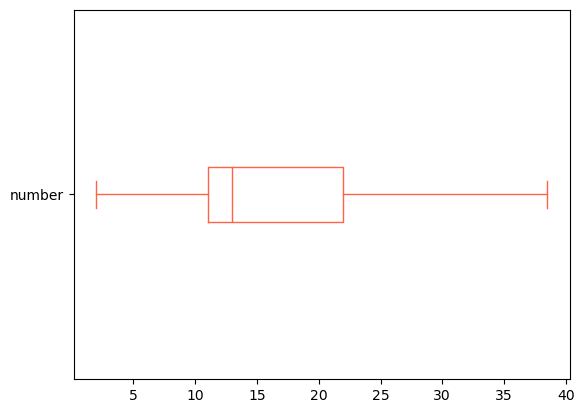

In [275]:
df['number'].plot(kind='box',color='tomato',vert=0)
plt.show()

#### v) Excel: check for irrelevant values

In [117]:
df.to_excel('merged_data.xlsx')

### 1. Performance Analaysis

#### a. Descriptive Analysis

In [781]:
def descriptive(col,plott='box'):
    if df[col].dtype != 'object':
        ser=pd.Series(df[col])
        print('Minimum:',ser.min())
        print('Maximum:',ser.max())
        print('Central Tendencies:')
        print('Mean:',st.mean(ser))
        print('Median:',st.median(ser))
        print('Mode:',st.mode(ser))
        print('Measure of dispersion:')
        print('Range:',ser.max()-ser.min())
        print('Inter quartile range:',ser.quantile(0.75)-ser.quantile(0.25))
        print('Standard deviation:',st.stdev(ser))
        print('Variance:',st.variance(ser))
        print('Skewness:',sts.skew(ser, bias = False))
        print('Kurtosis:',sts.kurtosis(ser, bias = False))
        print('-----------')
        df[col].plot(kind=plott,color='maroon')
        plt.gcf().set_size_inches(6,4)
        plt.xlabel(col)
        plt.ylabel('distribution')
        plt.title('Distribution of '+col)
    else:
        print('Unique values:',df[col].nunique())
        print('Maximum occuring:',df[col].mode()[0])
        print('Top occuring:',df[col].value_counts().head(7))
        print('-------')
        df.groupby(col)[col].count().sort_values(ascending=False).head(7).plot(kind='bar',color='peachpuff')
        plt.gcf().set_size_inches(12,6)
        plt.xlabel(col)
        plt.xticks(rotation=60)
        plt.ylabel('count')
        plt.title('Count plot on '+col)
    plt.show()

Minimum: 0
Maximum: 3
Central Tendencies:
Mean: 0.4263270649845275
Median: 0
Mode: 0
Measure of dispersion:
Range: 3
Inter quartile range: 1.0
Standard deviation: 0.5943079662240043
Variance: 0.3532019587173122
Skewness: 1.3483517678795756
Kurtosis: 2.1817778105784793
-----------


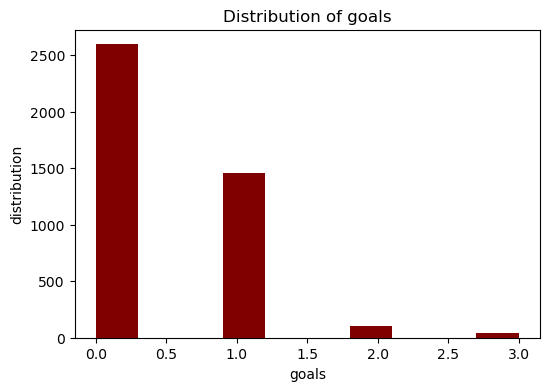

In [783]:
descriptive('goals','hist')

#### b. pushing file to Sql

In [409]:
db=pymysql.connect(host='localhost',user='root',password='Matilda97',database='company')

In [411]:
mycursor=db.cursor()

In [419]:
d1=df.groupby('season')[['home_club_goals','away_club_goals']].mean()

In [435]:
engine=create_engine('mysql+pymysql://{user}:{pw}@{host}/{db}'
.format(host='localhost',user='root',pw='Matilda97',db='company'))

In [437]:
d1.to_sql('Year_wise_goals',engine)

9

#### c. Visualise

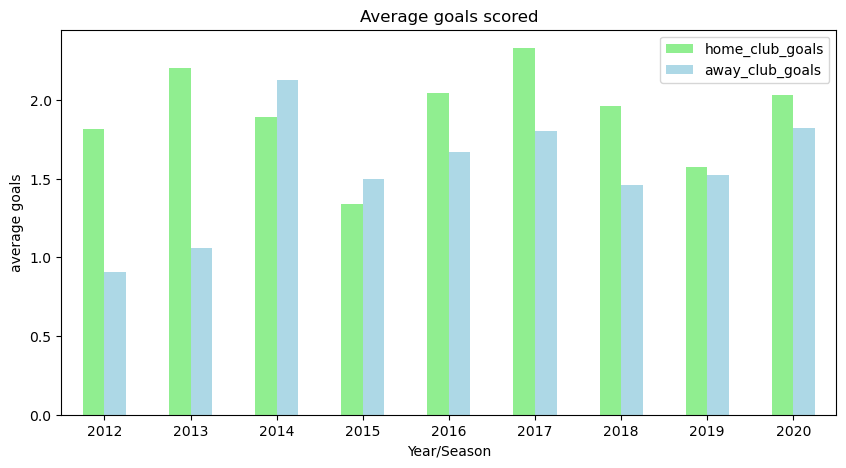

In [441]:
d1.plot(kind='bar',stacked=False,color=['lightgreen','lightblue'])
plt.gcf().set_size_inches(10,5)
plt.xlabel('Year/Season')
plt.xticks(rotation=0)
plt.ylabel('average goals')
plt.title('Average goals scored')
plt.show()

#### i) probablilities

In [271]:
fil=df[df['goals']==3]
prob=100*len(fil)/len(df)
print(f'The probability of scoring 3 goals in a game is, {round(prob)}%')

The probability of scoring 3 goals in a game is, 1%


In [180]:
fil1=df[df['country_of_birth']=='England']
p1=100*len(fil1)/len(df)
print(f'The probabilty of player from England scoring goal is {round(p1)}%')

The probabilty of player from England scoring goal is 2%


In [200]:
fil2=df[df['Age']>28]
p2=100*len(fil2)/len(df)
print(f'The probablilty of player whose age is above 28: {round(p2)}%')

The probablilty of player whose age is above 28: 32%


In [257]:
len(fil3)/len(df)

0.15932364848773517

In [261]:
fil3=df[df['foot']=='left']
fil4=df[(df['yellow_cards']==1) & (df['foot']=='left')]
p3=100*(len(fil4))/len(fil3)
print(f'The probabablity of recieving yellow card given that the player is left footed {round(p3)}%')

The probabablity of recieving yellow card given that the player is left footed 24%


In [263]:
fil3a=df[df['foot']=='right']
fil4a=df[(df['yellow_cards']==1) & (df['foot']=='right')]
p3a=100*(len(fil4a))/len(fil3a)
print(f'The probabablity of recieving yellow card given that the player is right footed {round(p3a)}%')

The probabablity of recieving yellow card given that the player is right footed 14%


In [228]:
fil5=df[df['competition_type']=='international_cup']
fil6=df[(df['competition_type']=='international_cup')&(df['attendance']<=50000)]
p4=100*len(fil6)/len(fil5)
print(f'The probability that the attendance is atmost 50000 given its an international cup is {round(p4)}%')

The probability that the attendance is atmost 50000 given its an international cup is 60%


#### ii) data sampling
Average of minutes played is estimated for each sample 

In [209]:
# Population mean of goals
mean_p=st.mean(df['minutes_played'])
sample_mean=[]
sample_mean.append(mean_p)

In [211]:
# simple random sampling without replacement
samp=df.sample(n=200,random_state=1)
sm=st.mean(samp['minutes_played'])
sample_mean.append(sm)

In [213]:
# simple random sampling with replacement
samp1=df.sample(n=200,replace=True,random_state=1)
sm1=st.mean(samp1['minutes_played'])
sample_mean.append(sm1)

In [215]:
# stratified sampling
strat_sample=[]
grouped=df.groupby('season')
year=df.season.unique()
for i in year:
    get_dat=grouped.get_group(i)
    data=get_dat.sample(frac=.05,random_state=1)
    strat_sample.append(data)
strat_sample=pd.concat(strat_sample,ignore_index=True)
sample_mean.append(st.mean(strat_sample['minutes_played']))

In [217]:
# Clustered sampling
clust_sample=[]
group=df.groupby('competition_type')
cup=['domestic_cup','international_cup']
for c in cup:
    get_grp=group.get_group(c)
    cl_data=get_grp.sample(n=100,random_state=1)
    clust_sample.append(cl_data)
clust_sample=pd.concat(clust_sample,ignore_index=True)
sample_mean.append(st.mean(clust_sample['minutes_played']))

In [219]:
syst_sample=df[::21]
sample_mean.append(st.mean(syst_sample['minutes_played']))

In [221]:
sam_name=['population','srs_without_repl','srs_with_repl','stratified','clustered','systematic']
mean_sam=pd.DataFrame({'sample':sam_name,'Mean':sample_mean})
mean_sam

,sample,Mean
0,population,69.734937
1,srs_without_repl,70.830000
2,srs_with_repl,69.695000
3,stratified,69.392344
4,clustered,66.900000
5,systematic,68.180000


#### iii) Central limit theorem

In [223]:
# population statistics
list_p=df['minutes_played'].tolist()
mean_p=st.mean(list_p)
median_p=st.median(list_p)
mode_p=st.mode(list_p)
std_p=st.stdev(list_p)
skew_p=sts.skew(list_p, bias = False)
kurt_p=sts.kurtosis(list_p, bias = False)
print('Mean of poluation:',mean_p)
print('Median of population:',median_p)
print('Mode of population:',mode_p)
print('Standard deviation:',std_p)
print('skewness of population:',skew_p)
print('Kurtosis of population:',kurt_p)

Mean of poluation: 69.73493688973565
Median of population: 77
Mode of population: 90
Standard deviation: 22.695993988055037
skewness of population: -1.0946447078945352
Kurtosis of population: 0.6885687479556966


In [225]:
# Sample from SRs without replacement of size 200 statistics
list_s=samp1['minutes_played'].tolist()
mean_s=st.mean(list_s)
median_s=st.median(list_s)
mode_s=st.mode(list_s)
std_s=st.stdev(list_s)
skew_s=sts.skew(list_s, bias=False)
kurt_s=sts.kurtosis(list_s, bias=False)
print('Mean of sample:',mean_s)
print('Median of sample:',median_s)
print('Mode of sample:',mode_s)
print('Standard deviation:',std_s)
print('skewness of sample:',skew_s)
print('Kurtosis of sample:',kurt_s)

Mean of sample: 69.695
Median of sample: 76.5
Mode of sample: 90
Standard deviation: 23.9001687300871
skewness of sample: -1.0180425228337258
Kurtosis of sample: 0.591769169380715


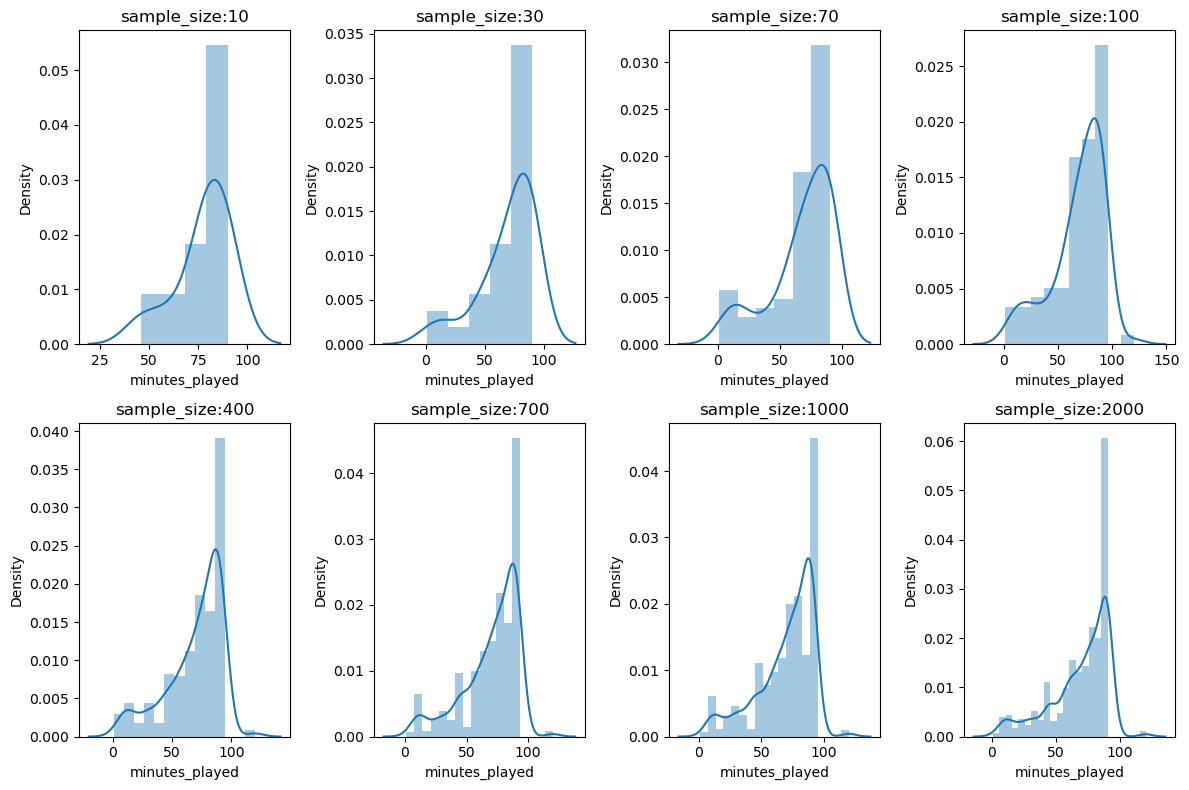

In [317]:
num=[10,30,70,100,400,700,1000,2000]
list=[]
for i in num:
    sam=df.sample(n=i,random_state=1,replace=True)
    list.append(sam['minutes_played'])
k=0
fig,ax=plt.subplots(2,4,figsize=(12,8),tight_layout=True)
for r in range(0,2):
    for j in range(0,4):
        sns.distplot(list[k],ax=ax[r,j])
        ax[r,j].set_title('sample_size:'+str(num[k]))
        k=k+1
plt.show()   

In [309]:
sample_df=pd.DataFrame()
for i in range(0,20):
    sample_df['sample_'+str(i)]=df['minutes_played'].sample(n=40,replace=True).reset_index(drop=True)

mean=[]
for i in sample_df.columns:
    mean.append(st.mean(sample_df[i]))

mean

[65.6,
 69.425,
 71.85,
 73.1,
 73,
 70.425,
 68.35,
 73.775,
 67.975,
 61.675,
 67.425,
 67.775,
 71.775,
 71.125,
 71.85,
 69.775,
 70.875,
 64.35,
 69,
 65.4]

In [311]:
st.stdev(mean)

3.2005599325085217

In [313]:
std_p/m.sqrt(40)

3.588551738187114

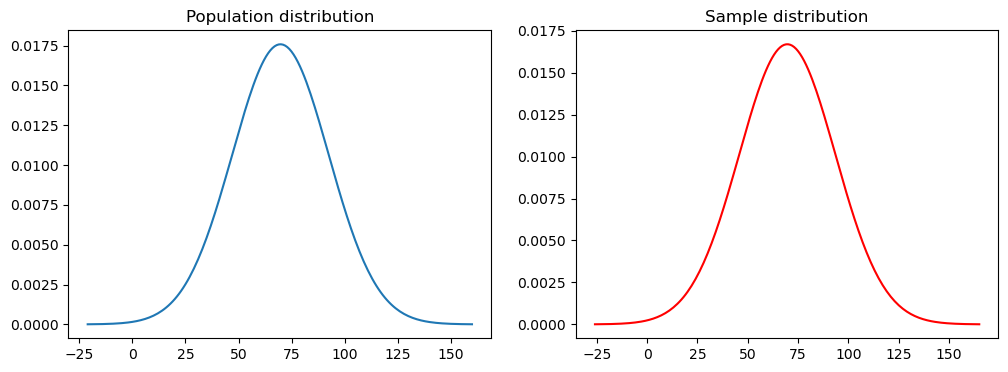

In [269]:
lower_p=mean_p-4*std_p
lower_s=mean_s-4*std_s
upper_p=mean_p+4*std_p
upper_s=mean_s+4*std_s
norm_p=np.arange(lower_p,upper_p)
norm_s=np.arange(lower_s,upper_s)
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(norm_p,norm.pdf(norm_p,mean_p,std_p))
ax[1].plot(norm_s,norm.pdf(norm_s,mean_s,std_s),color='red')
ax[0].set_title('Population distribution')
ax[1].set_title('Sample distribution')
plt.show()

#### iv) Normal distribution

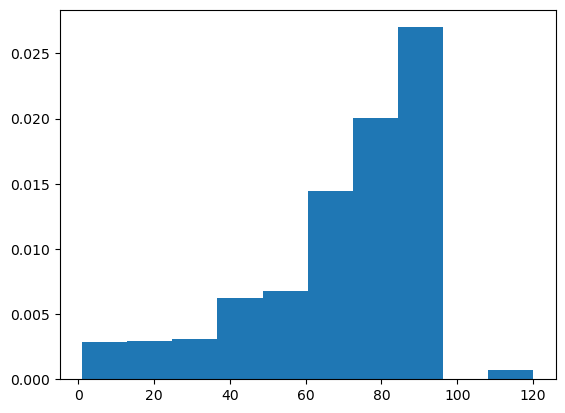

In [273]:
plt.hist(df['minutes_played'],density=True)
plt.show()

#### v) Logistic Regression

In [ ]:
To build logistic regression model to predict whether an yellow card warning will be issued or not based on various factors?

In [55]:
log=df[['goals', 'assists', 'minutes_played','market_value_in_eur','Age','sub_position', 'field_position','foot','height_in_cm','stadium', 'attendance', 'referee']]
log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4201 entries, 0 to 1
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   goals                4201 non-null   int64  
 1   assists              4201 non-null   int64  
 2   minutes_played       4201 non-null   int64  
 3   market_value_in_eur  4201 non-null   float64
 4   Age                  4201 non-null   int32  
 5   sub_position         4201 non-null   object 
 6   field_position       4201 non-null   object 
 7   foot                 4201 non-null   object 
 8   height_in_cm         4201 non-null   float64
 9   stadium              4201 non-null   object 
 10  attendance           4201 non-null   float64
 11  referee              4201 non-null   object 
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 410.3+ KB


In [57]:
cat=log.select_dtypes(include='object')
for c in cat:
    label_enc=preprocessing.LabelEncoder()
    log[c+'_enc']=label_enc.fit_transform(log[c])
col_drop=list(log.select_dtypes(include='object'))
log=log.drop(col_drop,axis=1)
log

,goals,assists,minutes_played,market_value_in_eur,Age,height_in_cm,attendance,sub_position_enc,field_position_enc,foot_enc,stadium_enc,referee_enc
0,0,0,90,700000.0,35,186.0,50000.0,8,1,2,60,76
1,0,0,90,700000.0,35,186.0,50000.0,8,1,2,60,76
2,0,0,90,700000.0,35,186.0,50000.0,8,1,2,60,76
3,0,0,90,700000.0,35,186.0,50000.0,8,1,2,60,76
4,0,0,90,700000.0,35,186.0,50000.0,8,1,2,60,76
...,...,...,...,...,...,...,...,...,...,...,...,...
4196,0,0,84,300000.0,26,175.0,2843.0,5,0,2,85,86
4197,0,0,84,300000.0,26,175.0,2843.0,5,0,2,85,86
4198,0,0,84,300000.0,26,175.0,2843.0,5,0,2,85,86
0,0,0,58,3000000.0,27,177.0,3908.0,1,2,2,49,54


In [59]:
col=log.columns
scale=StandardScaler()
log_scl=scale.fit_transform(log)
log_scl=pd.DataFrame(log_scl,columns=col)
log_scl

,goals,assists,minutes_played,market_value_in_eur,Age,height_in_cm,attendance,sub_position_enc,field_position_enc,foot_enc,stadium_enc,referee_enc
0,-0.717436,-0.362375,0.893400,-0.977441,2.145954,0.650942,0.685093,1.154858,0.584791,0.450784,-0.260928,0.345333
1,-0.717436,-0.362375,0.893400,-0.977441,2.145954,0.650942,0.685093,1.154858,0.584791,0.450784,-0.260928,0.345333
2,-0.717436,-0.362375,0.893400,-0.977441,2.145954,0.650942,0.685093,1.154858,0.584791,0.450784,-0.260928,0.345333
3,-0.717436,-0.362375,0.893400,-0.977441,2.145954,0.650942,0.685093,1.154858,0.584791,0.450784,-0.260928,0.345333
4,-0.717436,-0.362375,0.893400,-0.977441,2.145954,0.650942,0.685093,1.154858,0.584791,0.450784,-0.260928,0.345333
...,...,...,...,...,...,...,...,...,...,...,...,...
4196,-0.717436,-0.362375,0.628959,-1.014194,-0.834262,-1.062764,-1.218836,-0.014568,-0.732478,0.450784,0.439690,0.624575
4197,-0.717436,-0.362375,0.628959,-1.014194,-0.834262,-1.062764,-1.218836,-0.014568,-0.732478,0.450784,0.439690,0.624575
4198,-0.717436,-0.362375,0.628959,-1.014194,-0.834262,-1.062764,-1.218836,-0.014568,-0.732478,0.450784,0.439690,0.624575
4199,-0.717436,-0.362375,-0.516954,-0.766115,-0.503127,-0.751181,-1.175837,-1.573802,1.902061,0.450784,-0.569200,-0.268999


In [61]:
log_scl=log_scl.iloc[:-2,:]
log_scl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   goals                4199 non-null   float64
 1   assists              4199 non-null   float64
 2   minutes_played       4199 non-null   float64
 3   market_value_in_eur  4199 non-null   float64
 4   Age                  4199 non-null   float64
 5   height_in_cm         4199 non-null   float64
 6   attendance           4199 non-null   float64
 7   sub_position_enc     4199 non-null   float64
 8   field_position_enc   4199 non-null   float64
 9   foot_enc             4199 non-null   float64
 10  stadium_enc          4199 non-null   float64
 11  referee_enc          4199 non-null   float64
dtypes: float64(12)
memory usage: 393.8 KB


In [463]:
abs(log_scl.corr())>0.7

,goals,assists,minutes_played,market_value_in_eur,Age,height_in_cm,attendance,sub_position_enc,field_position_enc,foot_enc,stadium_enc,referee_enc
goals,True,False,False,False,False,False,False,False,False,False,False,False
assists,False,True,False,False,False,False,False,False,False,False,False,False
minutes_played,False,False,True,False,False,False,False,False,False,False,False,False
market_value_in_eur,False,False,False,True,False,False,False,False,False,False,False,False
Age,False,False,False,False,True,False,False,False,False,False,False,False
height_in_cm,False,False,False,False,False,True,False,False,False,False,False,False
attendance,False,False,False,False,False,False,True,False,False,False,False,False
sub_position_enc,False,False,False,False,False,False,False,True,False,False,False,False
field_position_enc,False,False,False,False,False,False,False,False,True,False,False,False
foot_enc,False,False,False,False,False,False,False,False,False,True,False,False


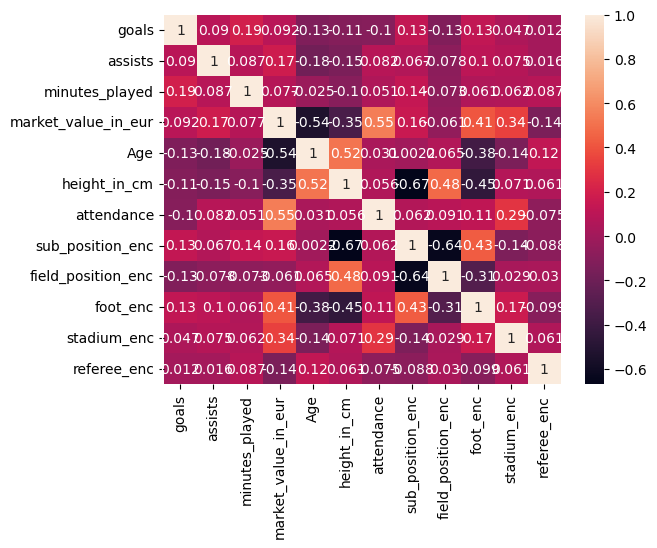

In [465]:
sns.heatmap(log_scl.corr(),annot=True)
plt.gcf().set_size_inches(12,8)
plt.show()

In [63]:
log_x=log_scl
log_y=df.iloc[:-2,:]['yellow_cards']
X_log_tr,X_log_ts,y_log_tr,y_log_ts=train_test_split(log_x,log_y,test_size=0.3,random_state=0)

In [65]:
logreg=LogisticRegression().fit(X_log_tr,y_log_tr)
y_pred_log=logreg.predict(X_log_ts)
y_pred_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
print(confusion_matrix(y_log_ts,y_pred_log))

[[1044   11]
 [ 198    7]]


In [69]:
# yellow goals
print('accuracy:',accuracy_score(y_log_ts,y_pred_log))
print('recall:',recall_score(y_log_ts,y_pred_log))
print('precision:',precision_score(y_log_ts,y_pred_log))
print('f1_score:',f1_score(y_log_ts,y_pred_log))

accuracy: 0.8341269841269842
recall: 0.03414634146341464
precision: 0.3888888888888889
f1_score: 0.06278026905829596


In [73]:
print('Roc probablilty:',roc_auc_score(y_log_ts,logreg.predict_proba(X_log_ts)[:,1]))

Roc probablilty: 0.7481169806958733


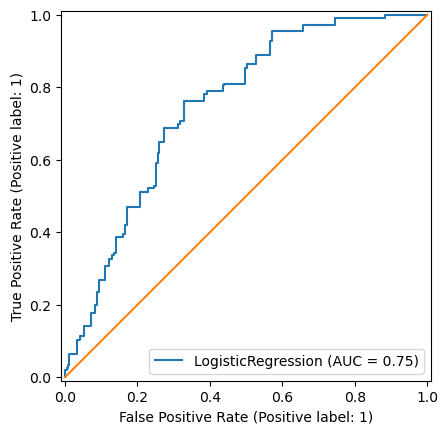

In [75]:
# yellow cards
RocCurveDisplay.from_estimator(logreg,X_log_ts,y_log_ts)
plt.plot([0,1],[0,1])
plt.show()

In [483]:
# Checking for test data
test_log=logreg.predict(log_scl.iloc[-2:,:])
test_log

array([0, 0], dtype=int64)

In [485]:
df.iloc[-2:,:]['yellow_cards']

0    0
1    0
Name: yellow_cards, dtype: int64

In [77]:
log1=df[['yellow_cards', 'assists', 'minutes_played','market_value_in_eur','Age','sub_position', 'field_position','foot','height_in_cm','stadium', 'attendance', 'referee']]
log1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4201 entries, 0 to 1
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yellow_cards         4201 non-null   int64  
 1   assists              4201 non-null   int64  
 2   minutes_played       4201 non-null   int64  
 3   market_value_in_eur  4201 non-null   float64
 4   Age                  4201 non-null   int32  
 5   sub_position         4201 non-null   object 
 6   field_position       4201 non-null   object 
 7   foot                 4201 non-null   object 
 8   height_in_cm         4201 non-null   float64
 9   stadium              4201 non-null   object 
 10  attendance           4201 non-null   float64
 11  referee              4201 non-null   object 
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 410.3+ KB


In [79]:
cat1=log1.select_dtypes(include='object')
for c in cat1:
    label_enc=preprocessing.LabelEncoder()
    log1[c+'_enc']=label_enc.fit_transform(log1[c])
col_drop=list(log1.select_dtypes(include='object'))
log1=log1.drop(col_drop,axis=1)
log1

,yellow_cards,assists,minutes_played,market_value_in_eur,Age,height_in_cm,attendance,sub_position_enc,field_position_enc,foot_enc,stadium_enc,referee_enc
0,1,0,90,700000.0,35,186.0,50000.0,8,1,2,60,76
1,1,0,90,700000.0,35,186.0,50000.0,8,1,2,60,76
2,1,0,90,700000.0,35,186.0,50000.0,8,1,2,60,76
3,1,0,90,700000.0,35,186.0,50000.0,8,1,2,60,76
4,1,0,90,700000.0,35,186.0,50000.0,8,1,2,60,76
...,...,...,...,...,...,...,...,...,...,...,...,...
4196,0,0,84,300000.0,26,175.0,2843.0,5,0,2,85,86
4197,0,0,84,300000.0,26,175.0,2843.0,5,0,2,85,86
4198,0,0,84,300000.0,26,175.0,2843.0,5,0,2,85,86
0,0,0,58,3000000.0,27,177.0,3908.0,1,2,2,49,54


In [81]:
col1=log1.columns
scale1=StandardScaler()
log_scl1=scale1.fit_transform(log1)
log_scl1=pd.DataFrame(log_scl1,columns=col1)
log_scl1

,yellow_cards,assists,minutes_played,market_value_in_eur,Age,height_in_cm,attendance,sub_position_enc,field_position_enc,foot_enc,stadium_enc,referee_enc
0,2.291613,-0.362375,0.893400,-0.977441,2.145954,0.650942,0.685093,1.154858,0.584791,0.450784,-0.260928,0.345333
1,2.291613,-0.362375,0.893400,-0.977441,2.145954,0.650942,0.685093,1.154858,0.584791,0.450784,-0.260928,0.345333
2,2.291613,-0.362375,0.893400,-0.977441,2.145954,0.650942,0.685093,1.154858,0.584791,0.450784,-0.260928,0.345333
3,2.291613,-0.362375,0.893400,-0.977441,2.145954,0.650942,0.685093,1.154858,0.584791,0.450784,-0.260928,0.345333
4,2.291613,-0.362375,0.893400,-0.977441,2.145954,0.650942,0.685093,1.154858,0.584791,0.450784,-0.260928,0.345333
...,...,...,...,...,...,...,...,...,...,...,...,...
4196,-0.436374,-0.362375,0.628959,-1.014194,-0.834262,-1.062764,-1.218836,-0.014568,-0.732478,0.450784,0.439690,0.624575
4197,-0.436374,-0.362375,0.628959,-1.014194,-0.834262,-1.062764,-1.218836,-0.014568,-0.732478,0.450784,0.439690,0.624575
4198,-0.436374,-0.362375,0.628959,-1.014194,-0.834262,-1.062764,-1.218836,-0.014568,-0.732478,0.450784,0.439690,0.624575
4199,-0.436374,-0.362375,-0.516954,-0.766115,-0.503127,-0.751181,-1.175837,-1.573802,1.902061,0.450784,-0.569200,-0.268999


In [83]:
log_scl1=log_scl1.iloc[:-2,:]
log_scl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yellow_cards         4199 non-null   float64
 1   assists              4199 non-null   float64
 2   minutes_played       4199 non-null   float64
 3   market_value_in_eur  4199 non-null   float64
 4   Age                  4199 non-null   float64
 5   height_in_cm         4199 non-null   float64
 6   attendance           4199 non-null   float64
 7   sub_position_enc     4199 non-null   float64
 8   field_position_enc   4199 non-null   float64
 9   foot_enc             4199 non-null   float64
 10  stadium_enc          4199 non-null   float64
 11  referee_enc          4199 non-null   float64
dtypes: float64(12)
memory usage: 393.8 KB


In [85]:
log_scl1['goals_scored']=np.where(df.iloc[:-2,:]['goals']>0,1,0)
log_scl1['goals_scored']

0       0
1       0
2       0
3       0
4       0
       ..
4194    0
4195    0
4196    0
4197    0
4198    0
Name: goals_scored, Length: 4199, dtype: int32

In [531]:
abs(log_scl1.corr())>0.7

,yellow_cards,assists,minutes_played,market_value_in_eur,Age,height_in_cm,attendance,sub_position_enc,field_position_enc,foot_enc,stadium_enc,referee_enc,goals_scored
yellow_cards,True,False,False,False,False,False,False,False,False,False,False,False,False
assists,False,True,False,False,False,False,False,False,False,False,False,False,False
minutes_played,False,False,True,False,False,False,False,False,False,False,False,False,False
market_value_in_eur,False,False,False,True,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,True,False,False,False,False,False,False,False,False
height_in_cm,False,False,False,False,False,True,False,False,False,False,False,False,False
attendance,False,False,False,False,False,False,True,False,False,False,False,False,False
sub_position_enc,False,False,False,False,False,False,False,True,False,False,False,False,False
field_position_enc,False,False,False,False,False,False,False,False,True,False,False,False,False
foot_enc,False,False,False,False,False,False,False,False,False,True,False,False,False


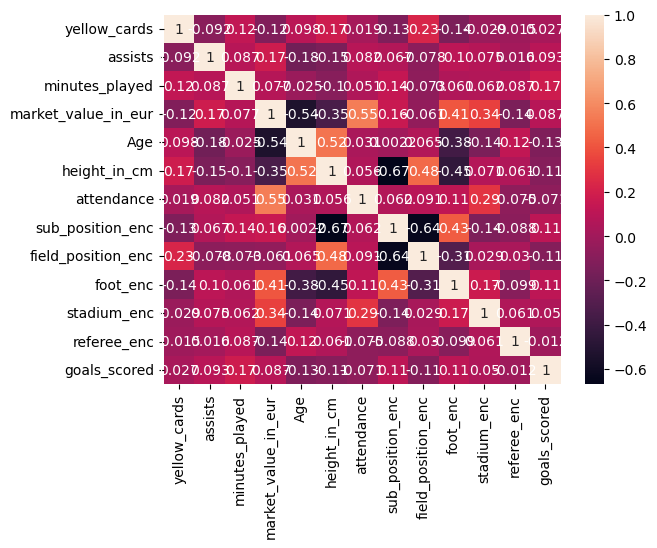

In [533]:
sns.heatmap(log_scl1.corr(),annot=True)
plt.gcf().set_size_inches(12,8)
plt.show()

In [87]:
log_x1=log_scl1.drop('goals_scored',axis=1)
log_y1=log_scl1['goals_scored']
X_log_tr1,X_log_ts1,y_log_tr1,y_log_ts1=train_test_split(log_x1,log_y1,test_size=0.3,random_state=0)

In [89]:
logreg1=LogisticRegression().fit(X_log_tr1,y_log_tr1)
y_pred_log1=logreg1.predict(X_log_ts1)
y_pred_log1

array([0, 1, 0, ..., 0, 1, 0])

In [91]:
print(confusion_matrix(y_log_ts1,y_pred_log1))

[[704  84]
 [310 162]]


In [93]:
print('accuracy:',accuracy_score(y_log_ts1,y_pred_log1))
print('recall:',recall_score(y_log_ts1,y_pred_log1))
print('precision:',precision_score(y_log_ts1,y_pred_log1))
print('f1_score:',f1_score(y_log_ts1,y_pred_log1))

accuracy: 0.6873015873015873
recall: 0.3432203389830508
precision: 0.6585365853658537
f1_score: 0.45125348189415043


In [97]:
print('Roc probablilty:',roc_auc_score(y_log_ts1,logreg1.predict_proba(X_log_ts1)[:,1]))

Roc probablilty: 0.6686284737159082


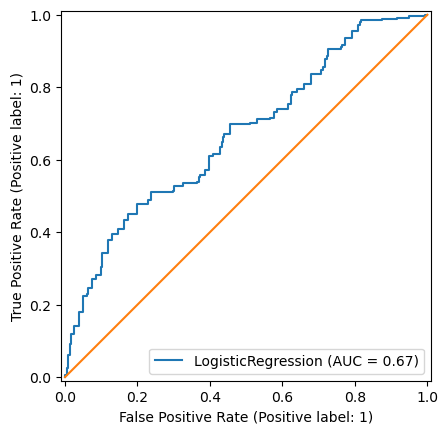

In [99]:
# goals
RocCurveDisplay.from_estimator(logreg1,X_log_ts1,y_log_ts1)
plt.plot([0,1],[0,1])
plt.show()

In [545]:
# Checking for test data
test_log1=logreg1.predict(log_scl1.iloc[-2:,:-1])
test_log1

array([0, 0])

In [547]:
df.iloc[-2:,:]['goals']

0    0
1    0
Name: goals, dtype: int64

#### Summary

### 2. Player Profile & Market value

Minimum: 300000.0
Maximum: 25000000.0
Central Tendencies:
Mean: 11338098.641887061
Median: 7000000.0
Mode: 25000000.0
Measure of dispersion:
Range: 24700000.0
Inter quartile range: 24200000.0
Standard deviation: 10884912.975428773
Variance: 118481330482657.69
Skewness: 0.26629978536252064
Kurtosis: -1.7792225497917031
-----------


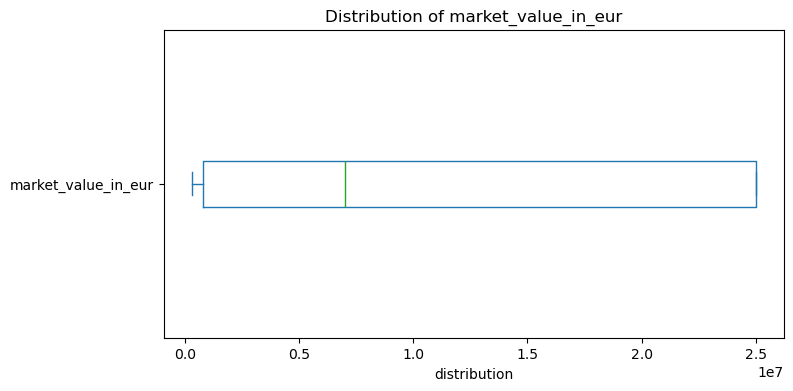

In [459]:
# Descriptive 
descriptive('market_value_in_eur')

Minimum: 171.0
Maximum: 194.0
Central Tendencies:
Mean: 181.82170911687695
Median: 178.0
Mode: 177.0
Measure of dispersion:
Range: 23.0
Inter quartile range: 9.0
Standard deviation: 6.419602793834285
Variance: 41.21130003060496
Skewness: 0.6326720083571556
Kurtosis: -0.8783879444536371
-----------


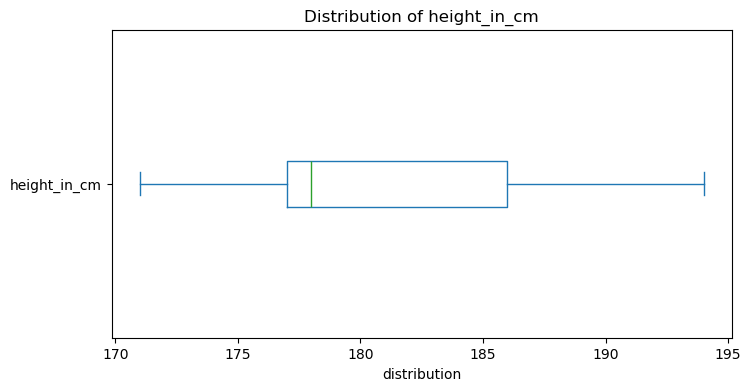

In [463]:
descriptive('height_in_cm')

In [493]:
# Push file to sql
d2=df.groupby('Age')[['market_value_in_eur']].sum()
d2.to_sql('Age_total_market_val',engine)

11

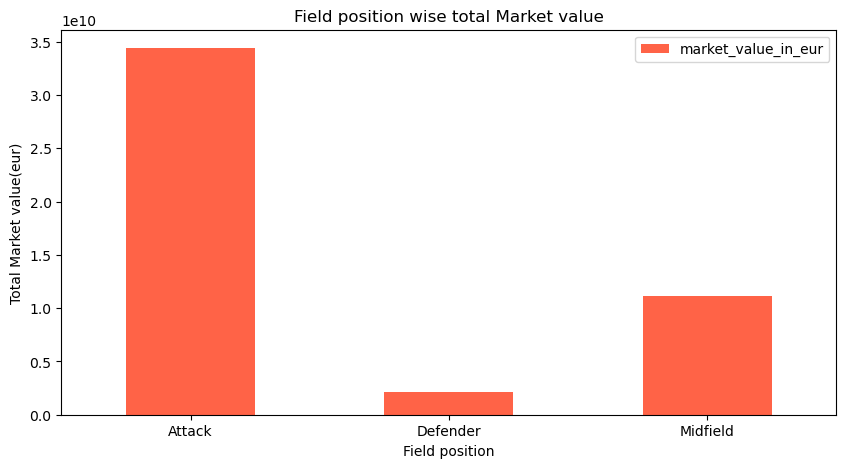

In [501]:
# Visualise
df.groupby('field_position')[['market_value_in_eur']].sum().plot(kind='bar',color='tomato')
plt.gcf().set_size_inches(10,5)
plt.xlabel('Field position')
plt.xticks(rotation=0)
plt.ylabel('Total Market value(eur)')
plt.title('Field position wise total Market value')
plt.show()

#### i) Linear Regression

In [119]:
reg=df[['goals','assists','yellow_cards','home_club_name', 'away_club_name','minutes_played','market_value_in_eur','Age','lineup/sub','sub_position','field_position','team_captain','in_position','foot','height_in_cm','stadium','attendance','referee']]
reg

,goals,assists,yellow_cards,home_club_name,away_club_name,minutes_played,market_value_in_eur,Age,lineup/sub,sub_position,field_position,team_captain,in_position,foot,height_in_cm,stadium,attendance,referee
0,0,0,1,1.FC Nuremberg,FC Bayern Munich,90,700000.0,35,substitutes,Right-Back,Defender,0,Right-Back,right,186.0,Max-Morlock-Stadion,50000.0,Manuel Graofe
1,0,0,1,1.FC Nuremberg,FC Bayern Munich,90,700000.0,35,substitutes,Right-Back,Defender,0,Right-Back,right,186.0,Max-Morlock-Stadion,50000.0,Manuel Graofe
2,0,0,1,1.FC Nuremberg,FC Bayern Munich,90,700000.0,35,substitutes,Right-Back,Defender,0,Right-Back,right,186.0,Max-Morlock-Stadion,50000.0,Manuel Graofe
3,0,0,1,1.FC Nuremberg,FC Bayern Munich,90,700000.0,35,substitutes,Right-Back,Defender,0,Right-Back,right,186.0,Max-Morlock-Stadion,50000.0,Manuel Graofe
4,0,0,1,1.FC Nuremberg,FC Bayern Munich,90,700000.0,35,substitutes,Right-Back,Defender,0,Right-Back,right,186.0,Max-Morlock-Stadion,50000.0,Manuel Graofe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,0,0,0,Football Club Nords,Hobro IK,84,300000.0,26,starting_lineup,Left Winger,Attack,0,Right Midfield,right,175.0,Right to Dream Park,2843.0,Michael Tykgaard
4197,0,0,0,Football Club Nords,Hobro IK,84,300000.0,26,substitutes,Left Winger,Attack,0,Left Winger,right,175.0,Right to Dream Park,2843.0,Michael Tykgaard
4198,0,0,0,Football Club Nords,Hobro IK,84,300000.0,26,starting_lineup,Left Winger,Attack,0,Centre-Forward,right,175.0,Right to Dream Park,2843.0,Michael Tykgaard
0,0,0,0,Willem II Tilburg,Heracles Almelo,58,3000000.0,27,starting_lineup,Central Midfield,Midfield,0,Right Midfield,right,177.0,Koning Willem II Stadion,3908.0,Jeroen Manschot


In [95]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   goals                4199 non-null   int64  
 1   assists              4199 non-null   int64  
 2   yellow_cards         4199 non-null   int64  
 3   home_club_name       4199 non-null   object 
 4   away_club_name       4199 non-null   object 
 5   minutes_played       4199 non-null   int64  
 6   market_value_in_eur  4199 non-null   float64
 7   Age                  4199 non-null   int32  
 8   lineup/sub           4199 non-null   object 
 9   sub_position         4199 non-null   object 
 10  field_position       4199 non-null   object 
 11  team_captain         4199 non-null   int64  
 12  in_position          4199 non-null   object 
 13  foot                 4199 non-null   object 
 14  height_in_cm         4199 non-null   float64
 15  stadium              4199 non-null   o

In [121]:
# Feature Engineering
cat=reg.select_dtypes(include='object')
for col in cat.columns:
    label_encod=preprocessing.LabelEncoder()
    reg[col+'_enc']=label_encod.fit_transform(reg[col])
col_drop=reg.select_dtypes(include='object')
reg=reg.drop(col_drop,axis=1)
reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4201 entries, 0 to 1
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   goals                4201 non-null   int64  
 1   assists              4201 non-null   int64  
 2   yellow_cards         4201 non-null   int64  
 3   minutes_played       4201 non-null   int64  
 4   market_value_in_eur  4201 non-null   float64
 5   Age                  4201 non-null   int32  
 6   team_captain         4201 non-null   int64  
 7   height_in_cm         4201 non-null   float64
 8   attendance           4201 non-null   float64
 9   home_club_name_enc   4201 non-null   int32  
 10  away_club_name_enc   4201 non-null   int32  
 11  lineup/sub_enc       4201 non-null   int32  
 12  sub_position_enc     4201 non-null   int32  
 13  field_position_enc   4201 non-null   int32  
 14  in_position_enc      4201 non-null   int32  
 15  foot_enc             4201 non-null   int32  
 

In [123]:
# Data scaling
col=reg.columns
scale=StandardScaler()
df_scl=scale.fit_transform(reg)
df_scaled1=pd.DataFrame(df_scl,columns=col)

In [62]:
# extracting last 2 rows
df_scaled=df_scaled1.iloc[:-2,:]
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   goals                4199 non-null   float64
 1   assists              4199 non-null   float64
 2   yellow_cards         4199 non-null   float64
 3   minutes_played       4199 non-null   float64
 4   market_value_in_eur  4199 non-null   float64
 5   Age                  4199 non-null   float64
 6   team_captain         4199 non-null   float64
 7   height_in_cm         4199 non-null   float64
 8   attendance           4199 non-null   float64
 9   home_club_name_enc   4199 non-null   float64
 10  away_club_name_enc   4199 non-null   float64
 11  lineup/sub_enc       4199 non-null   float64
 12  sub_position_enc     4199 non-null   float64
 13  field_position_enc   4199 non-null   float64
 14  in_position_enc      4199 non-null   float64
 15  foot_enc             4199 non-null   f

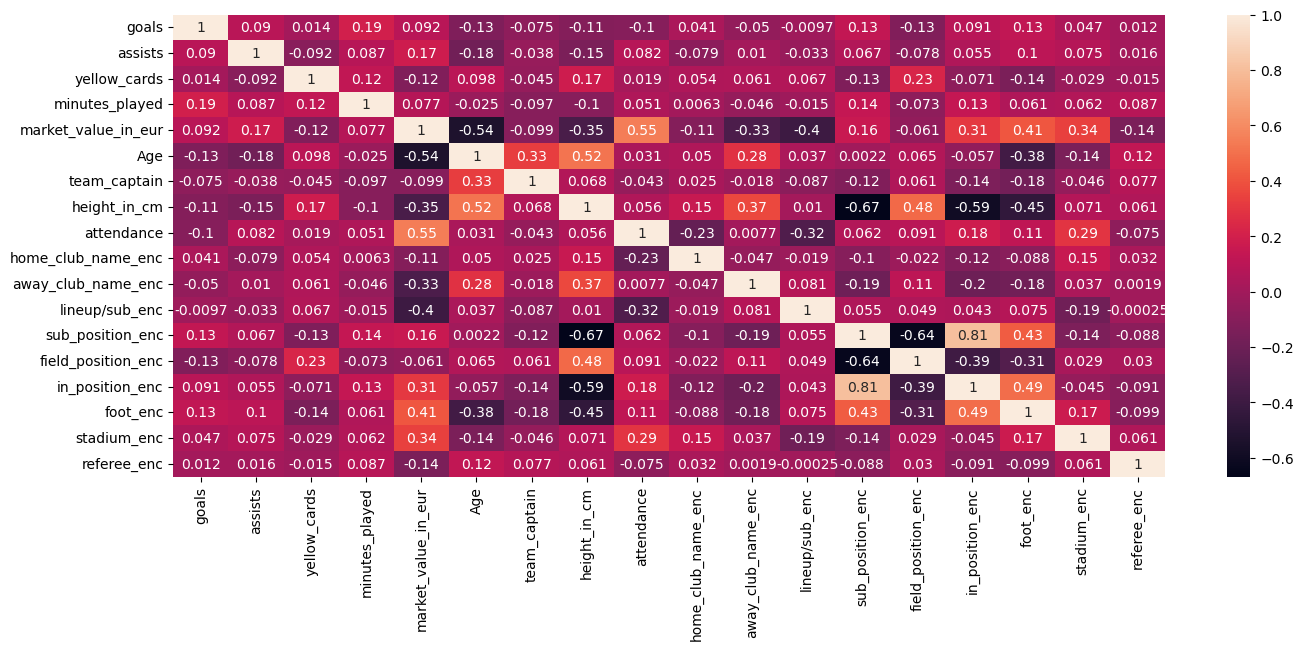

In [109]:
# Feature selection
sns.heatmap(df_scaled.corr(),annot=True)
plt.gcf().set_size_inches(16,6)
plt.show()

In [561]:
# Checking for high co-linearity between independent features
abs(df_scaled.corr())>0.7

,goals,assists,yellow_cards,minutes_played,market_value_in_eur,Age,team_captain,height_in_cm,attendance,home_club_name_enc,away_club_name_enc,lineup/sub_enc,sub_position_enc,field_position_enc,in_position_enc,foot_enc,stadium_enc,referee_enc
goals,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
assists,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
yellow_cards,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
minutes_played,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
market_value_in_eur,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
team_captain,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
height_in_cm,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
attendance,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
home_club_name_enc,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [563]:
df_scaled.drop('in_position_enc',axis=1)

,goals,assists,yellow_cards,minutes_played,market_value_in_eur,Age,team_captain,height_in_cm,attendance,home_club_name_enc,away_club_name_enc,lineup/sub_enc,sub_position_enc,field_position_enc,foot_enc,stadium_enc,referee_enc
0,-0.717436,-0.362375,2.291613,0.893400,-0.977441,2.145954,-0.104056,0.650942,0.685093,-1.401123,-0.649582,1.194538,1.154858,0.584791,0.450784,-0.260928,0.345333
1,-0.717436,-0.362375,2.291613,0.893400,-0.977441,2.145954,-0.104056,0.650942,0.685093,-1.401123,-0.649582,1.194538,1.154858,0.584791,0.450784,-0.260928,0.345333
2,-0.717436,-0.362375,2.291613,0.893400,-0.977441,2.145954,-0.104056,0.650942,0.685093,-1.401123,-0.649582,1.194538,1.154858,0.584791,0.450784,-0.260928,0.345333
3,-0.717436,-0.362375,2.291613,0.893400,-0.977441,2.145954,-0.104056,0.650942,0.685093,-1.401123,-0.649582,1.194538,1.154858,0.584791,0.450784,-0.260928,0.345333
4,-0.717436,-0.362375,2.291613,0.893400,-0.977441,2.145954,-0.104056,0.650942,0.685093,-1.401123,-0.649582,1.194538,1.154858,0.584791,0.450784,-0.260928,0.345333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,-0.717436,-0.362375,-0.436374,0.628959,-1.014194,-0.834262,-0.104056,-1.062764,-1.218836,-0.139113,0.036702,-0.837144,-0.014568,-0.732478,0.450784,0.439690,0.624575
4195,-0.717436,-0.362375,-0.436374,0.628959,-1.014194,-0.834262,-0.104056,-1.062764,-1.218836,-0.139113,0.036702,-0.837144,-0.014568,-0.732478,0.450784,0.439690,0.624575
4196,-0.717436,-0.362375,-0.436374,0.628959,-1.014194,-0.834262,-0.104056,-1.062764,-1.218836,-0.139113,0.036702,-0.837144,-0.014568,-0.732478,0.450784,0.439690,0.624575
4197,-0.717436,-0.362375,-0.436374,0.628959,-1.014194,-0.834262,-0.104056,-1.062764,-1.218836,-0.139113,0.036702,1.194538,-0.014568,-0.732478,0.450784,0.439690,0.624575


In [565]:
abs(df_scaled.corr()[['market_value_in_eur']].sort_values('market_value_in_eur',ascending=False))

,market_value_in_eur
market_value_in_eur,1.000000
attendance,0.547036
foot_enc,0.409027
stadium_enc,0.341544
in_position_enc,0.308177
assists,0.173245
sub_position_enc,0.157047
goals,0.091788
minutes_played,0.077168
field_position_enc,0.061138


In [567]:
x1=np.array(df_scaled['attendance']).reshape(-1,1)
y=np.array(df_scaled['market_value_in_eur']).reshape(-1,1)

In [569]:
x_tr_reg,x_ts_reg,y_tr_reg,y_ts_reg=train_test_split(x1,y,test_size=0.3,random_state=1)
lreg1=LinearRegression().fit(x_tr_reg,y_tr_reg)
y_pred_reg=lreg1.predict(x_ts_reg)
y_pred_reg

array([[ 0.06477799],
       [ 0.3839668 ],
       [-0.21258607],
       ...,
       [ 0.41038243],
       [-0.71668426],
       [-0.67609225]])

In [156]:
print('Intercept:',lreg1.intercept_)
print('Slope:',lreg1.coef_)

Intercept: [0.00377271]
Slope: [[0.54514261]]


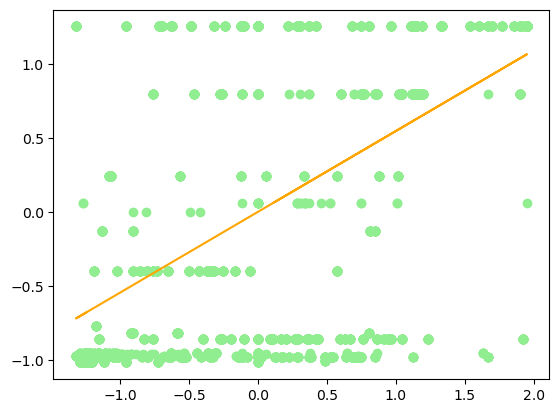

In [219]:
plt.scatter(df_scaled['attendance'],df_scaled['market_value_in_eur'],color='lightgreen')
plt.plot(x_ts_reg,y_pred_reg,color='orange')
plt.show()

In [137]:
print('MSE:',mean_squared_error(y_ts_reg,y_pred_reg))
print('MAE:',mean_absolute_error(y_ts_reg,y_pred_reg))
print('RMSE:',mean_squared_error(y_ts_reg,y_pred_reg,squared=False))
print('r2score:',r2_score(y_ts_reg,y_pred_reg))

MSE: 0.6869789044727096
MAE: 0.6844879622000004
RMSE: 0.8288419055964229
r2score: 0.3051140391899757


In [583]:
# checking for test data
test1=np.array(df_scaled1.iloc[-2:]['attendance']).reshape(-1,1)
ab=lreg1.predict(test1)
ab

array([[-0.63726128],
       [-0.63726128]])

In [573]:
df_scaled1.iloc[-2:]['market_value_in_eur']

4199   -0.766115
4200   -0.766115
Name: market_value_in_eur, dtype: float64

In [ ]:
Equation: Y= 0.00377271 + 0.54514261X
X=attendance
Y=Market value in eur

#### ii) Multi Linear Regression 1

In [143]:
x2=np.array(df_scaled[['attendance','Age']]).reshape(-1,2)
y=np.array(df_scaled['market_value_in_eur'])

In [145]:
x_tr1,x_ts1,y_tr1,y_ts1=train_test_split(x2,y,test_size=0.3,random_state=1)
mreg1=LinearRegression().fit(x_tr1,y_tr1)
y_pr1=mreg1.predict(x_ts1)
y_pr1

array([-0.57926332, -0.80556669, -0.864279  , ..., -0.77842234,
        0.28060916, -0.23197664])

In [158]:
print('Intercept:',mreg1.intercept_)
print('Slope:',mreg1.coef_)

Intercept: 0.001419983177303366
Slope: [ 0.56021427 -0.55807664]


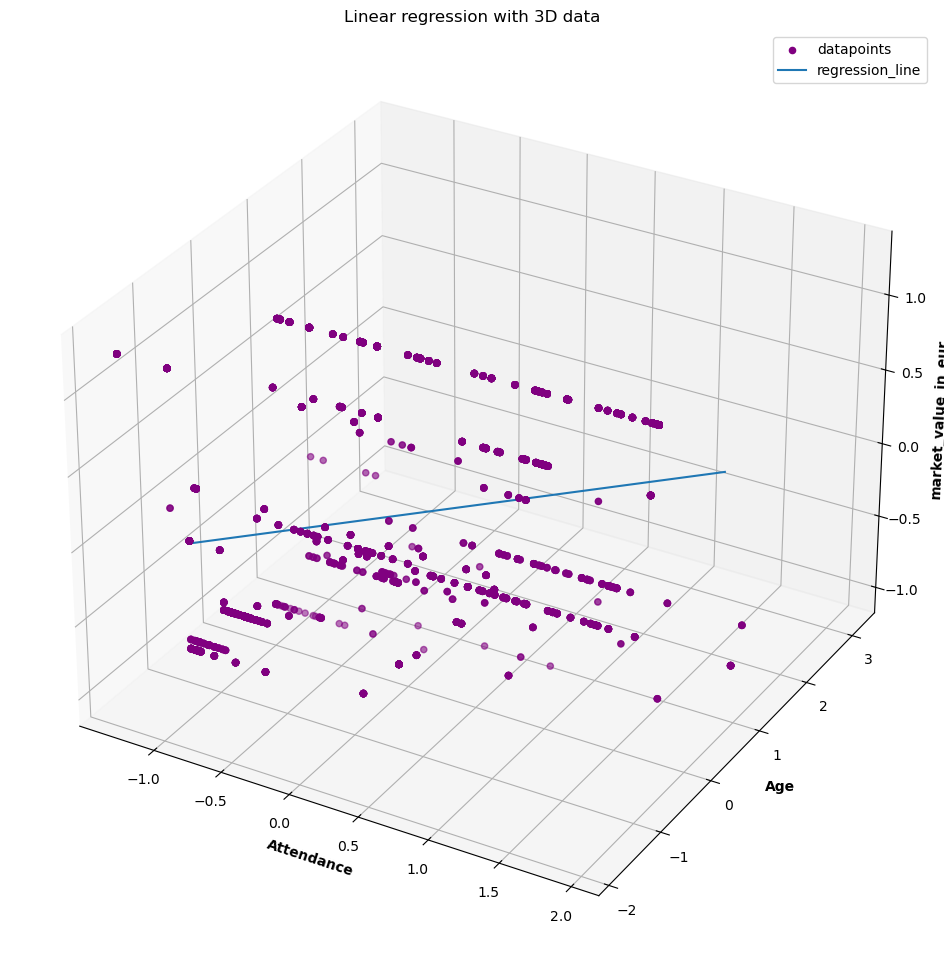

In [221]:
# 3D scatter plot
y1=np.array(df_scaled['market_value_in_eur'])
x=x2[:,0]
y=x2[:,1]
z=y1
x1_line=np.arange(min(x),max(x),0.1)
x2_line=np.array([mreg1.coef_[0]*val+(-mreg1.intercept_+mreg1.coef_[1]*np.mean(y))for val in x1_line])
y_line=mreg1.coef_[0]*x1_line + mreg1.coef_[1]*x2_line + mreg1.intercept_
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(111,projection='3d')
#ax.grid(b=True,)
ax.scatter3D(x,y,z,color='purple',label='datapoints')
# plor reg line
ax.plot(x1_line,x2_line,y_line,label='regression_line')
ax.set_xlabel('Attendance',fontweight='bold')
ax.set_ylabel('Age',fontweight='bold')
#plt.xlim(-2,1.5)
ax.set_zlabel('market_value_in_eur',fontweight='bold')
ax.set_title('Linear regression with 3D data')
ax.legend()
plt.show()

In [147]:
print('MSE:',mean_squared_error(y_ts1,y_pr1))
print('MAE:',mean_absolute_error(y_ts1,y_pr1))
print('RMSE:',mean_squared_error(y_ts1,y_pr1,squared=False))
print('r2score:',r2_score(y_ts1,y_pr1))

MSE: 0.38832388821660674
MAE: 0.4975480787893011
RMSE: 0.6231563914593244
r2score: 0.6072065438807069


In [ ]:
Equation: Y=  0.001419 + 0.56X1-0.558X2 
X1=attendance
X2=Age
Y=Market value in eur

#### iii) Multi Linear Regression 2

In [170]:
x3=np.array(df_scaled[['attendance','Age','foot_enc']]).reshape(-1,3)
y=np.array(df_scaled['market_value_in_eur'])

In [176]:
x_tr2,x_ts2,y_tr2,y_ts2=train_test_split(x3,y,test_size=0.3,random_state=1)
mreg2=LinearRegression().fit(x_tr2,y_tr2)
y_pr2=mreg2.predict(x_ts2)
y_pr2

array([-0.78325451, -0.60638263, -1.05733485, ..., -0.58027974,
        0.26715236, -0.18302505])

In [178]:
print('Intercept:',mreg2.intercept_)
print('Slope:',mreg2.coef_)

Intercept: 0.0036876004874017744
Slope: [ 0.53872023 -0.49363147  0.16329957]


In [180]:
print('MSE:',mean_squared_error(y_ts2,y_pr2))
print('MAE:',mean_absolute_error(y_ts2,y_pr2))
print('RMSE:',mean_squared_error(y_ts2,y_pr2,squared=False))
print('r2score:',r2_score(y_ts2,y_pr2))

MSE: 0.3681722238163786
MAE: 0.4832834631459343
RMSE: 0.6067719701966947
r2score: 0.627590151859793


In [ ]:
Equation: Y= 0.003 + 0.538X1 -0.493X2+  0.163X3
X1=attendance
X2=Age
X3=foot_enc
Y=Market value in eur

#### iii) Multi Linear Regression 3

In [184]:
x4=np.array(df_scaled[['attendance','Age','foot_enc','lineup/sub_enc']]).reshape(-1,4)
y=np.array(df_scaled['market_value_in_eur'])

In [186]:
x_tr3,x_ts3,y_tr3,y_ts3=train_test_split(x4,y,test_size=0.3,random_state=1)
mreg3=LinearRegression().fit(x_tr3,y_tr3)
y_pr3=mreg3.predict(x_ts3)
y_pr3

array([-0.62235838, -0.89317412, -1.3571407 , ..., -0.87121476,
        0.05423497, -0.37761639])

In [188]:
print('Intercept:',mreg3.intercept_)
print('Slope:',mreg3.coef_)

Intercept: 0.002463905386067576
Slope: [ 0.45320461 -0.46876985  0.20131955 -0.24816948]


In [190]:
print('MSE:',mean_squared_error(y_ts3,y_pr3))
print('MAE:',mean_absolute_error(y_ts3,y_pr3))
print('RMSE:',mean_squared_error(y_ts3,y_pr3,squared=False))
print('r2score:',r2_score(y_ts3,y_pr3))

MSE: 0.31619219586291336
MAE: 0.45204740191581677
RMSE: 0.5623096974647631
r2score: 0.6801684645739215


In [ ]:
Equation: Y= 0.002 +0.453X1 -0.468X2+ 0.201X3 -0.248X4 
X1=attendance
X2=Age
X3=foot_enc
X4=lineup/sub_enc
Y=Market value in eur

#### iii) Multi Linear Regression 4

In [193]:
x5=np.array(df_scaled[['attendance','Age','foot_enc','lineup/sub_enc','height_in_cm']]).reshape(-1,5)
y=np.array(df_scaled['market_value_in_eur'])

In [197]:
x_tr4,x_ts4,y_tr4,y_ts4=train_test_split(x5,y,test_size=0.3,random_state=1)
mreg4=LinearRegression().fit(x_tr4,y_tr4)
y_pr4=mreg4.predict(x_ts4)
y_pr4

array([-0.68276745, -0.88277964, -1.41401574, ..., -0.86050904,
       -0.03671843, -0.34288083])

In [199]:
print('Intercept:',mreg4.intercept_)
print('Slope:',mreg4.coef_)

Intercept: 0.002627027025860526
Slope: [ 0.45962814 -0.44399219  0.18049807 -0.24482153 -0.06458073]


In [201]:
print('MSE:',mean_squared_error(y_ts4,y_pr4))
print('MAE:',mean_absolute_error(y_ts4,y_pr4))
print('RMSE:',mean_squared_error(y_ts4,y_pr4,squared=False))
print('r2score:',r2_score(y_ts4,y_pr4))

MSE: 0.3154023638335582
MAE: 0.45021458457438746
RMSE: 0.5616069478145354
r2score: 0.6809673874884735


In [ ]:
tst=np.array().reshape(-1,5)

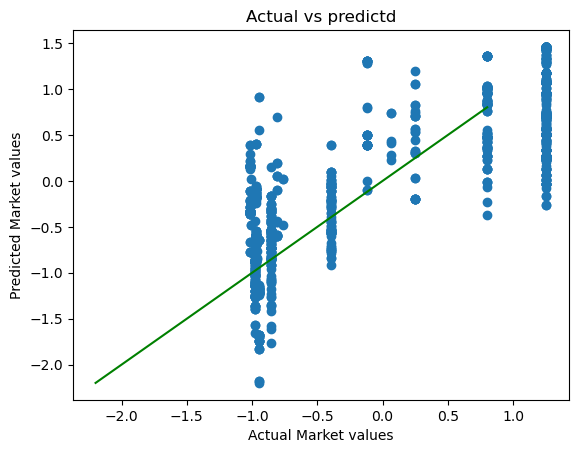

In [223]:
df_result=pd.DataFrame({'Actual':y_ts4,'Predicted':y_pr4})
df_result['residue']=abs(df_result['Actual'])-abs(df_result['Predicted'])
line_co=np.arange(df_result.min().min(),df_result.max().max())
plt.scatter(df_result['Actual'],df_result['Predicted'])
plt.plot(line_co,line_co,color='green')
plt.xlabel('Actual Market values')
plt.ylabel('Predicted Market values')
plt.title('Actual vs predictd')
plt.show()

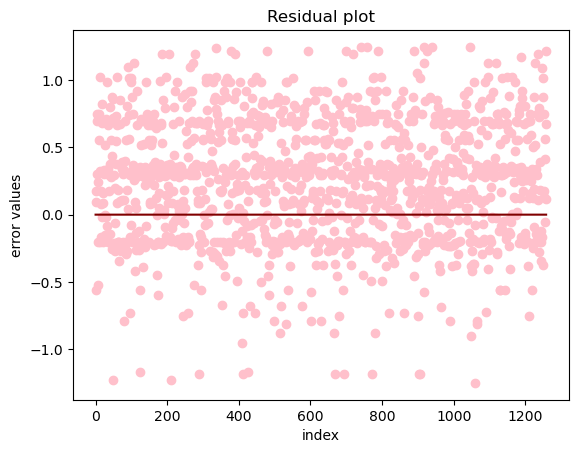

In [225]:
plt.scatter(df_result.index,df_result.residue,color='pink')
plt.plot(np.repeat(0,df_result.index.max()),color='maroon')
plt.xlabel('index')
plt.ylabel('error values')
plt.title('Residual plot')
plt.show()

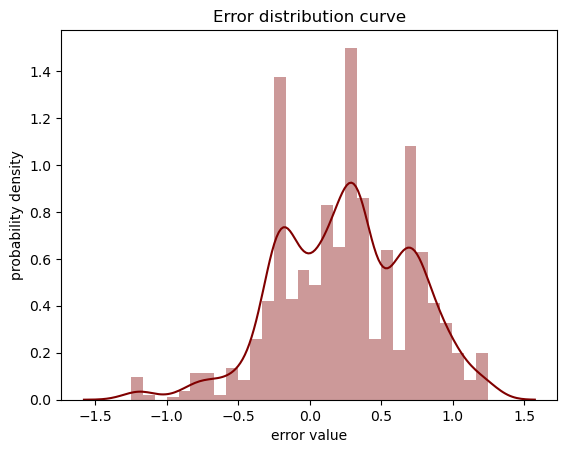

In [227]:
sns.distplot(df_result.residue,bins=30,kde=True,color='maroon')
plt.xlabel('error value')
plt.ylabel('probability density')
plt.title('Error distribution curve')
plt.show()

In [577]:
# Checking for test data
test2=np.array(df_scaled1.iloc[-2:][['attendance','Age','foot_enc','lineup/sub_enc','height_in_cm']]).reshape(-1,5)
ab1=mreg4.predict(test2)
ab1

array([ 0.02039182, -0.47700761])

In [579]:
df_scaled1.iloc[-2:]['market_value_in_eur']

4199   -0.766115
4200   -0.766115
Name: market_value_in_eur, dtype: float64

In [ ]:
Equation: Y= 0.00262 + 0.459X1 -0.4439X2 + 0.1804X3 -0.24482X4 -0.0645X5
X1=attendance
X2=Age
X3=foot_enc
X4=lineup/sub_enc
X5height_in_cm'
Y=Market value in eur

#### summary

### 3. Team comparison

Minimum: 0
Maximum: 7
Central Tendencies:
Mean: 1.5572482742204237
Median: 1
Mode: 1
Measure of dispersion:
Range: 7
Inter quartile range: 2.0
Standard deviation: 1.4713519689994534
Variance: 2.1648766166785687
Skewness: 1.200112462092738
Kurtosis: 1.4283042638247343
-----------


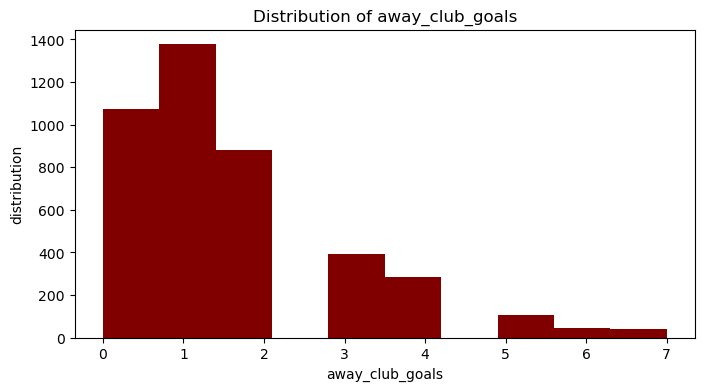

In [581]:
# Descriptive
descriptive('away_club_goals','hist')

Minimum: 0
Maximum: 7
Central Tendencies:
Mean: 1.8926446084265651
Median: 2
Mode: 2
Measure of dispersion:
Range: 7
Inter quartile range: 2.0
Standard deviation: 1.5228875078363142
Variance: 2.3191863615239003
Skewness: 0.948779088754267
Kurtosis: 0.7721160800101132
-----------


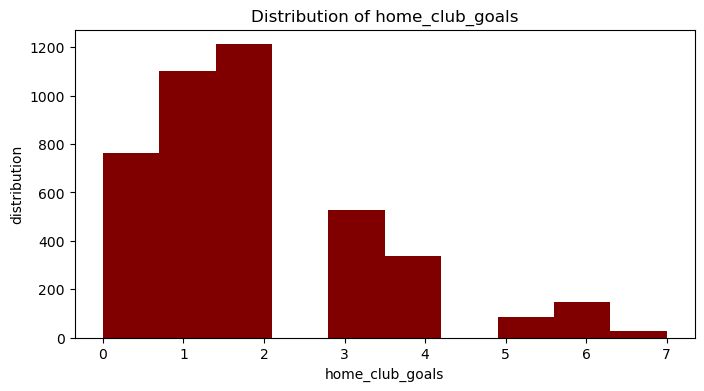

In [583]:
descriptive('home_club_goals','hist')

In [537]:
d3=df.groupby('home_club_name')[['home_club_goals']].sum()
d3=pd.DataFrame({'club_name':d3.index,'home_goals':d3.home_club_goals})
d3.to_sql('home_club',engine,index=False)

106

In [545]:
d4=df.groupby('away_club_name')[['away_club_goals']].sum()
d4=pd.DataFrame({'club_name':d4.index,'away_goals':d4.away_club_goals})
d4.to_sql('away_club',engine,index=False)

103

In [553]:
team_goals=pd.read_sql_query('select * from team_goals',engine)
team_goals.sort_values('total_goals',ascending=False).head(10)

,club_name,home_goals,away_goals,total_goals
9,Borussia Dortmund,1838,1186,3024
12,Chelsea Football Club,224,546,770
31,Hobro IK,458,278,736
21,FC Schalke 04,265,383,648
30,Hertha BSC,304,285,589
17,FC Bayern Munich,96,333,429
54,Sportverein Werder Bremen von 1899,163,210,373
55,Stade Rennais Football Club,264,96,360
3,AFC Ajax Amsterdam,175,182,357
1,1.FC Nuremberg,188,60,248


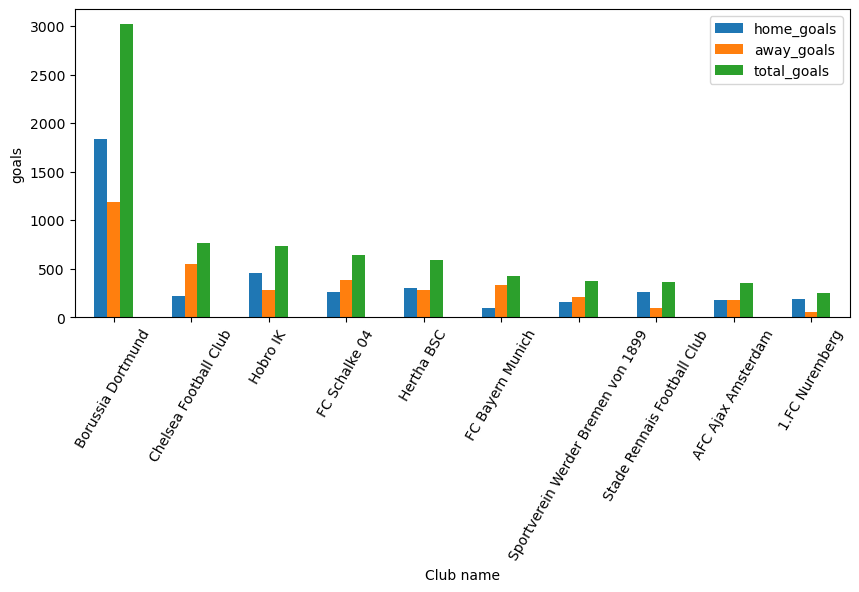

In [619]:
#visulaise
p1=team_goals.groupby('club_name')[['home_goals','away_goals','total_goals']].sum()
p1.sort_values('total_goals',ascending=False).head(10).plot(kind='bar',stacked=False,figsize=(10,4))
#plt.gcf().get_size_inches(10,6)
plt.xlabel('Club name')
plt.xticks(rotation=60)
plt.ylabel('goals')
plt.show()

#### Testing
#### i) 2 tailed Z test

In [ ]:
"Is there a significant difference between the average number of goals scored in 2018 and 2019 by Team Borussia Dortmund in their Home ground?"

In [335]:
data=df[df['home_club_name']=='Borussia Dortmund']
data

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,contract_expiration_date,game_event_id,minute,event_type,game_lineups_id,lineup/sub,number,team_captain,in_position,Age
49,2982072,EL,2017,intermediate stage 1st leg,2018-02-15,3,2,8.720195,9.202815,Peter Stoger,...,2027-06-30,7363d7c10d48447a3e4bf432c0ffaf15,85,Substitutions,4d5d7a2e7cf7ec9b0603b8d3661f5943,starting_lineup,11.0,0,Right Winger,27
50,2982072,EL,2017,intermediate stage 1st leg,2018-02-15,3,2,8.720195,9.202815,Peter Stoger,...,2027-06-30,7363d7c10d48447a3e4bf432c0ffaf15,85,Substitutions,5c4539ca03600a77434e9a796365ea7b,starting_lineup,11.0,0,Right Winger,27
51,2982072,EL,2017,intermediate stage 1st leg,2018-02-15,3,2,8.720195,9.202815,Peter Stoger,...,2027-06-30,7363d7c10d48447a3e4bf432c0ffaf15,85,Substitutions,37419eb7ccc71d265e7bc935c391895e,starting_lineup,11.0,0,Right Winger,27
52,2982072,EL,2017,intermediate stage 1st leg,2018-02-15,3,2,8.720195,9.202815,Peter Stoger,...,2027-06-30,7363d7c10d48447a3e4bf432c0ffaf15,85,Substitutions,24762c5cfd73a3d7506af76c2690fd32,starting_lineup,11.0,0,Right Winger,27
53,2982072,EL,2017,intermediate stage 1st leg,2018-02-15,3,2,8.720195,9.202815,Peter Stoger,...,2027-06-30,7363d7c10d48447a3e4bf432c0ffaf15,85,Substitutions,d83543498a0876ab2192a546c8312f7b,starting_lineup,11.0,0,Right Winger,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,3277194,NLP,2019,Second Round,2019-12-18,3,4,8.720195,9.202815,Andries Jonker,...,2024-06-30,dcc53063250430955c12b67b81120220,57,Goals,0f1017d047ad43d8cc33f1091762afe1,starting_lineup,8.0,0,Left-Back,25
4166,3277194,NLP,2019,Second Round,2019-12-18,3,4,8.720195,9.202815,Andries Jonker,...,2024-06-30,dcc53063250430955c12b67b81120220,57,Goals,abf64723d41894ed0b0f5ff67cf15082,starting_lineup,8.0,0,Left-Back,25
4167,3277194,NLP,2019,Second Round,2019-12-18,3,4,8.720195,9.202815,Andries Jonker,...,2024-06-30,dcc53063250430955c12b67b81120220,57,Goals,fbad8897b0fa9a80a58358d205762787,starting_lineup,8.0,0,Left-Back,25
4168,3277194,NLP,2019,Second Round,2019-12-18,3,4,8.720195,9.202815,Andries Jonker,...,2024-06-30,dcc53063250430955c12b67b81120220,57,Goals,d7988772275bdb8a5bd49c514d649e8b,starting_lineup,8.0,0,Left-Back,25


In [387]:
data1=data[data['season']==2018]
mean2z_a=data1['home_club_goals'].mean()
std2z_a=st.stdev(data1['home_club_goals'])
var2z_a=std2z_a**2
n2z_a=len(data1)

In [389]:
data2=data[data['season']==2019]
mean2z_b=data2['home_club_goals'].mean()
std2z_b=st.stdev(data2['home_club_goals'])
var2z_b=std2z_b**2
n2z_b=len(data2)

In [ ]:
Set Hypothesis
H0: There is no significant difference between the average number of goals scored in 2018 and 2019 by Team Borussia Dortmund in their Home ground
H1: There is significant difference between the average number of goals scored in 2018 and 2019 by Team Borussia Dortmund in their Home ground
H0: mu1 = mu2 --> mu1-mu2 = 0
H1: mu1 != mu2 --> mu1-mu2 != 0
Two tail test
Z test since both sata set has size above 30

In [391]:
# set alpha
alpha2z = 0.05
# set decision rule
# if p_value2z < alpha2z; -z_critical2 > z_stat2 > z_critical2; Then reject Null hypothesis

In [571]:
print('The goals data in 2018 by the team:')
print('Mean:',mean2z_a)
print('Variance:',var2z_a)
print('n1:',n2z_a)
print('The goals data in 2019 by the team:')
print('Mean:',mean2z_b)
print('Variance:',var2z_b)
print('n2:',n2z_b)

The goals data in 2018 by the team:
Mean: 2.53072625698324
Variance: 2.3178708179022034
n1: 179
The goals data in 2019 by the team:
Mean: 1.9836065573770492
Variance: 1.4163934426229507
n2: 61


In [573]:
z_stat2=(mean2z_a-mean2z_b)/m.sqrt((var2z_a/n2z_a)+(var2z_b/n2z_b))
p_value2z=norm.sf(abs(z_stat2))*2
z_crit2=norm.ppf(1-alpha2z/2)
print('Z statistics for 2 tail Z test:',z_stat2)
print('p value for 2 tail Z test:', p_value2z)
print('Z critical for 2 tail Z test:',z_crit2)

Z statistics for 2 tail Z test: 2.876846709212738
p value for 2 tail Z test: 0.004016706678685704
Z critical for 2 tail Z test: 1.959963984540054


In [ ]:
Statistical conclusion:
p value < alpha; 0.004 < 0.05
z statistics 2.8768 lies beyond z critical; 2.876 > 1.9599
Reject null hypothesis
Conclusion:
There is significant difference between the average number of goals scored in 2018 and 2019 by Team Borussia Dortmund in their Home ground

In [397]:
# upper & lower bound in confidence interval (1.96 is z_critical value for 95% confidence level)
lhs2z = (mean2z_a-mean2z_b) - 1.96*(m.sqrt(var2z_a/n2z_a + var2z_b/n2z_b))
rhs2z = (mean2z_a-mean2z_b) + 1.96*(m.sqrt(var2z_a/n2z_a + var2z_b/n2z_b))
print('Lower bound of confidence interval:',lhs2z)
print('Upper bound of confidence interval:',rhs2z)

Lower bound of confidence interval: 0.17436622344979574
Upper bound of confidence interval: 0.919873175762586


#### ii) 2 tailed T test

In [ ]:
"Is there a significant difference between the average number of goals scored by Hobro IK in home ground and away ground?"

In [317]:
sam=df[df['home_club_name']=='Hobro IK']
sle=df[df['away_club_name']=='Hobro IK']
home=sam['home_club_goals'].sample(n=25,random_state=1)
away=sle['away_club_goals'].sample(n=25,random_state=1)
mean_1za=home.mean()
mean_1zb=away.mean()
std_1za=st.stdev(home)
std_1zb=st.stdev(away)
var_1za=std_1za**2
var_1zb=std_1zb**2
n_1za=len(home)
n_1zb=len(away)
df=n_1za+n_1zb-2

In [319]:
print('Home goals:')
print('mean:',mean_1za)
print('variance:',var_1za)
print('n1:',n_1za)
print('--------')
print('Away goals:')
print('mean:',mean_1zb)
print('variance:',var_1zb)
print('n2:',n_1zb)
print('degrees of freedom:',df)

Home goals:
mean: 1.52
variance: 1.0933333333333335
n1: 25
--------
Away goals:
mean: 1.12
variance: 0.44333333333333336
n2: 25
degrees of freedom: 48


In [321]:
# set alpha
alpha1z = 0.05
# set decision rule
# if p_value1z < alpha1z; -t_crit1 > t_stat1 > t_crit1; Then reject Null hypothesis

In [323]:
t_stat1=abs(mean_1za-mean_1zb)/(m.sqrt((var_1za*(n_1za-1))+(var_1zb*(n_1zb-1)))*(m.sqrt((1/n_1za)+(1/n_1zb))))
Pvalue1t=t.sf(abs(t_stat1),df)*2 
t_crit1=t.ppf(1-alpha1z/2,df)
print('t statistics for 2 tail t test:',t_stat1)
print('p value for 2 tail t test:',Pvalue1t)
print('t critical for 2 tail t test:',t_crit1)

t statistics for 2 tail t test: 0.23287321641631106
p value for 2 tail t test: 0.8168500301559822
t critical for 2 tail t test: 2.010634757624232


#### Summary

### 4. Attendance & Stadium Analysis

#### Descriptive analysis

Minimum: 300.0
Maximum: 81365.0
Central Tendencies:
Mean: 33031.44546649146
Median: 31084.0
Mode: 33031.44546649146
Measure of dispersion:
Range: 81065.0
Inter quartile range: 41234.0
Standard deviation: 24771.214308749266
Variance: 613613058.3299843
Skewness: 0.48216439484097035
Kurtosis: -0.7912597140740845
-----------


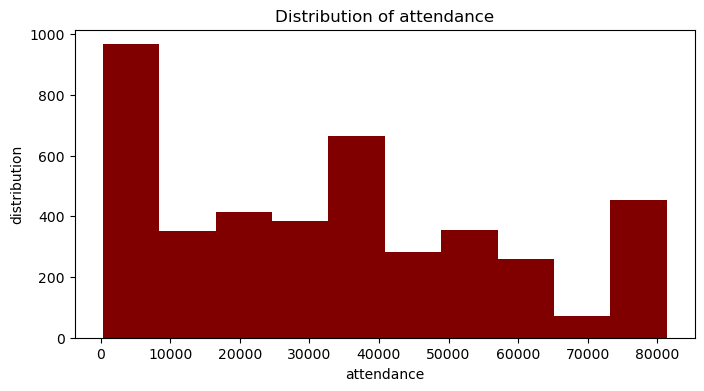

In [627]:
descriptive('attendance','hist')

Unique values: 124
Maximum occuring: SIGNAL IDUNA PARK
Top 7 occuring: stadium
SIGNAL IDUNA PARK        494
DS Arena                 312
Veltins-Arena            228
Right to Dream Park      225
Olympiastadion Berlin    205
Stamford Bridge          140
Commerzbank Arena        135
Name: count, dtype: int64
-------


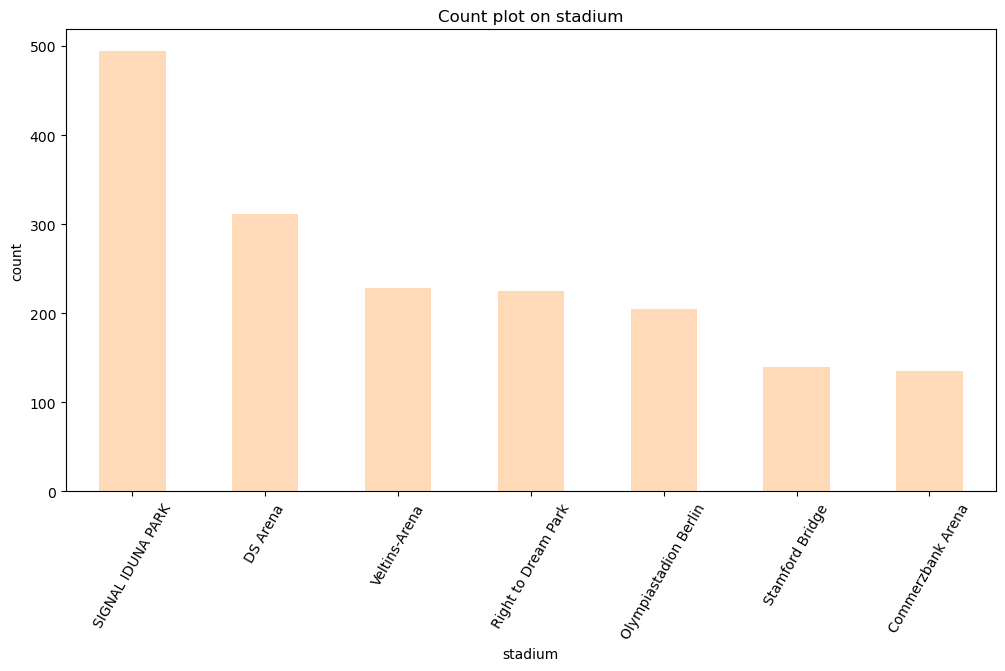

In [629]:
descriptive('stadium')

In [641]:
# Sql push
d5=df.groupby('stadium')[['attendance']].mean()
d5=pd.DataFrame({'Stadium':d5.index,'Attendance':d5.attendance})
d5.to_sql('stadium_attendance',engine,index=False)

124

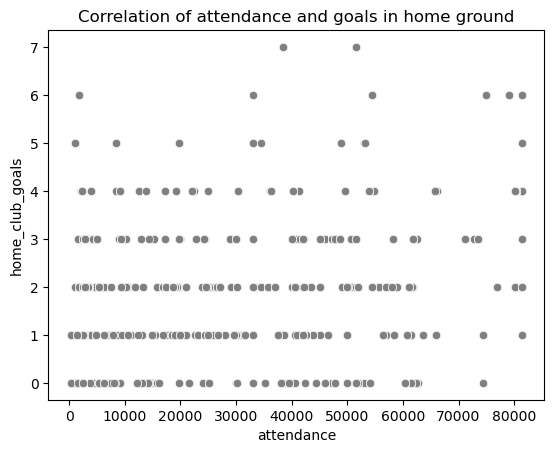

In [653]:
# visualise
sns.scatterplot(x=df['attendance'],y=df['home_club_goals'],color='grey')
plt.title('Correlation of attendance and goals in home ground')
plt.show()

#### i) K Nearest Neighboring

In [101]:
knn_1=df.copy()
knn_1.loc[knn_1['attendance']<17000,'attendance']=0
knn_1.loc[(knn_1['attendance']>=17000)&(knn_1['attendance']<41000),'attendance']=1
knn_1.loc[knn_1['attendance']>=41000,'attendance']=2

In [103]:
knn_n=knn_1[['stadium','season','goals','yellow_cards','minutes_played','competition_type']]
cat=knn_n.select_dtypes(include='object')
for c in cat.columns:
    lab_en=preprocessing.LabelEncoder()
    knn_n[c+'_enc']=lab_en.fit_transform(knn_n[c])
col_drop=knn_n.select_dtypes(include='object')
knn_n=knn_n.drop(col_drop,axis=1)
knn_n.columns

Index(['season', 'goals', 'yellow_cards', 'minutes_played', 'stadium_enc',
       'competition_type_enc'],
      dtype='object')

In [105]:
cols=knn_n.columns
scale=StandardScaler()
df_sc=scale.fit_transform(knn_n)
df_sc=pd.DataFrame(df_sc,columns=cols)
df_sc

,season,goals,yellow_cards,minutes_played,stadium_enc,competition_type_enc
0,-3.031016,-0.717436,2.291613,0.893400,-0.260928,0.00835
1,-3.031016,-0.717436,2.291613,0.893400,-0.260928,0.00835
2,-3.031016,-0.717436,2.291613,0.893400,-0.260928,0.00835
3,-3.031016,-0.717436,2.291613,0.893400,-0.260928,0.00835
4,-3.031016,-0.717436,2.291613,0.893400,-0.260928,0.00835
...,...,...,...,...,...,...
4196,-0.227807,-0.717436,-0.436374,0.628959,0.439690,0.00835
4197,-0.227807,-0.717436,-0.436374,0.628959,0.439690,0.00835
4198,-0.227807,-0.717436,-0.436374,0.628959,0.439690,0.00835
4199,1.454119,-0.717436,-0.436374,-0.516954,-0.569200,0.00835


In [107]:
knn=df_sc.iloc[:-2,:]
xn=knn
yn=knn_1.iloc[:-2,:]['attendance']
xtr_kn,xts_kn,ytr_kn,yts_kn=train_test_split(xn,yn,test_size=0.3,random_state=1)

[0.018253968253968255, 0.020634920634920634, 0.023809523809523808, 0.029365079365079365, 0.04047619047619048]


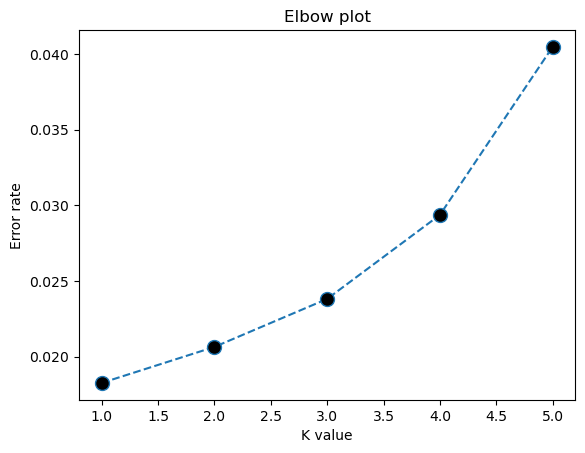

In [109]:
error=[]
for k in range(1,6):
    cls=neighbors.KNeighborsClassifier(n_neighbors=k)
    cls.fit(xtr_kn,ytr_kn)
    ykn=cls.predict(xts_kn)
    error.append(np.mean(ykn!=yts_kn))
plt.plot(range(1,6),error,linestyle='--',marker='o',markerfacecolor='0',markersize=10)
print(error)
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('Elbow plot')
plt.show()

In [111]:
k=1
knn3=neighbors.KNeighborsClassifier(n_neighbors=k)
knn3.fit(xtr_kn,ytr_kn)
y_pr_kn=knn3.predict(xts_kn)
y_pr_kn

array([1., 2., 1., ..., 2., 0., 0.])

In [113]:
print('accuracy:',accuracy_score(yts_kn,y_pr_kn))
print('recall:',recall_score(yts_kn,y_pr_kn,average='micro'))
print('precision:',precision_score(yts_kn,y_pr_kn,average='micro'))
print('f1_score:',f1_score(yts_kn,y_pr_kn,average='micro'))

accuracy: 0.9817460317460317
recall: 0.9817460317460317
precision: 0.9817460317460317
f1_score: 0.9817460317460317


In [115]:
y_prob_knn=knn3.predict_proba(xts_kn)
print('Roc probablilty:',roc_auc_score(yts_kn,y_prob_knn,multi_class='ovr'))

Roc probablilty: 0.9863448173796167


In [84]:
# check for test data
kn_test=df_sc.iloc[-2:]
test_pred=knn3.predict(kn_test)
test_pred

array([0., 0.])

In [86]:
knn_1.iloc[-2:]['attendance']

0    0.0
1    0.0
Name: attendance, dtype: float64

In [ ]:
Prediction of competition type based on attendance and stadium

In [125]:
knn1a=df_scaled1[['stadium_enc','attendance']]
lab_enc=preprocessing.LabelEncoder()
knn1a['competition_enc']=lab_enc.fit_transform(df['competition_type'])
knna=knn1a.iloc[:-2,:]
xna=knna.drop('competition_enc',axis=1)
yna=knna['competition_enc']
xtr_kna,xts_kna,ytr_kna,yts_kna=train_test_split(xna,yna,test_size=0.3,random_state=1)

[0.025396825396825397, 0.027777777777777776, 0.027777777777777776, 0.030952380952380953, 0.03253968253968254]


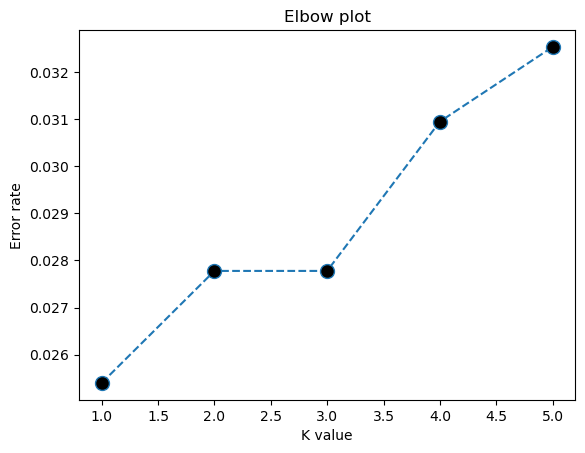

In [127]:
error=[]
for k in range(1,6):
    cls=neighbors.KNeighborsClassifier(n_neighbors=k)
    cls.fit(xtr_kna,ytr_kna)
    ykna=cls.predict(xts_kna)
    error.append(np.mean(ykna!=yts_kna))
plt.plot(range(1,6),error,linestyle='--',marker='o',markerfacecolor='0',markersize=10)
print(error)
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('Elbow plot')
plt.show()

In [129]:
k=1
knn3a=neighbors.KNeighborsClassifier(n_neighbors=k)
knn3a.fit(xtr_kna,ytr_kna)
y_pr_kna=knn3a.predict(xts_kna)
y_pr_kna

array([1, 1, 1, ..., 1, 0, 1])

In [131]:
print(confusion_matrix(y_pr_kna,yts_kna))

[[ 105   10    0    0]
 [   4 1037    0   14]
 [   0    4   80    0]
 [   0    0    0    6]]


In [139]:
print('accuracy:',accuracy_score(yts_kna,y_pr_kna))
print('recall:',recall_score(yts_kna,y_pr_kna,average='micro'))
print('precision:',precision_score(yts_kna,y_pr_kna,average='micro'))
print('f1_score:',f1_score(yts_kna,y_pr_kna,average='micro'))

accuracy: 0.9746031746031746
recall: 0.9746031746031746
precision: 0.9746031746031746
f1_score: 0.9746031746031746


In [141]:
y_prob_knna=knn3a.predict_proba(xts_kna)
print('Roc probablilty:',roc_auc_score(yts_kna,y_prob_knna,multi_class='ovr'))

Roc probablilty: 0.8939724719452105


In [106]:
# check for test data
kn_test=df_scaled1.iloc[-2:][['stadium_enc','attendance']]
test_pred=knn3a.predict(kn_test)
test_pred

array([1, 1])

In [110]:
knn1a.iloc[-2:]['competition_enc']

4199    1
4200    1
Name: competition_enc, dtype: int32

#### summary

### 5. Referee Analysis

Unique values: 131
Maximum occuring: Felix Zwayer
Top occuring: referee
Felix Zwayer         258
Manuel Graofe        160
Daniel Siebert       152
Peter Kjaersgaard    152
Dr. Felix Brych      140
Marco Fritz          128
Tobias Stieler       120
Name: count, dtype: int64
-------


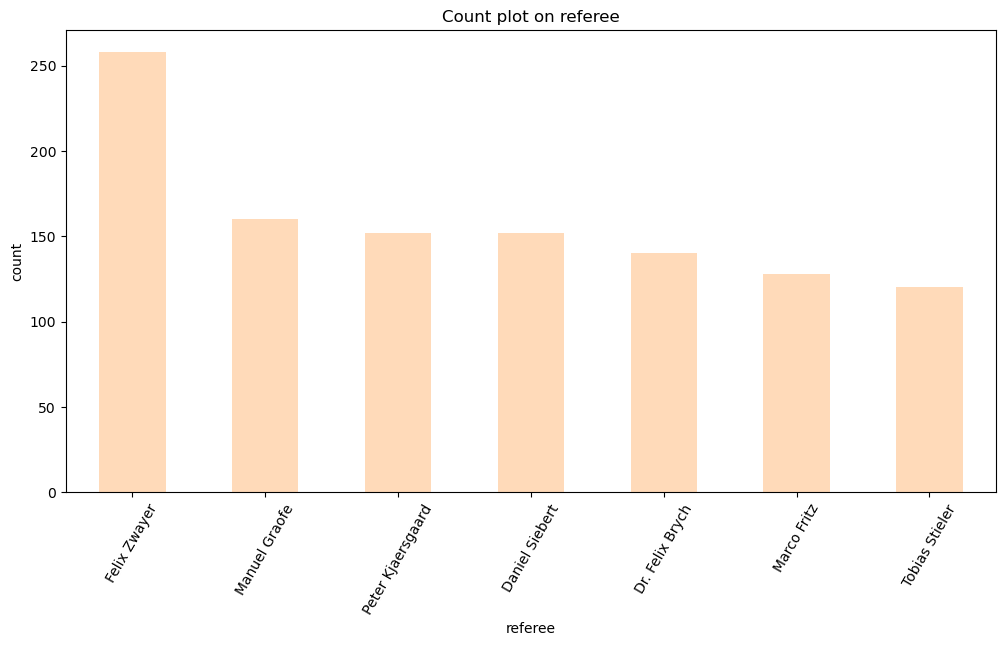

In [785]:
# Descriptive
descriptive('referee')

[[76 53 49 45 30 28 26 25 25 25]]


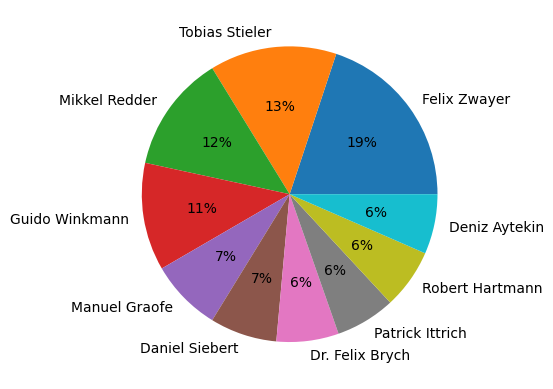

In [112]:
# Visualise
p2=df.groupby('referee')[['yellow_cards']].sum().sort_values('yellow_cards',ascending=False).head(10)
print(np.array(p2).reshape(1,-1))
plt.pie(p2.yellow_cards,labels=p2.index,autopct='%i%%')
plt.show()

### 6. Substitution Patterns

Unique values: 2
Maximum occuring: starting_lineup
Top occuring: lineup/sub
starting_lineup    2470
substitutes        1731
Name: count, dtype: int64
-------


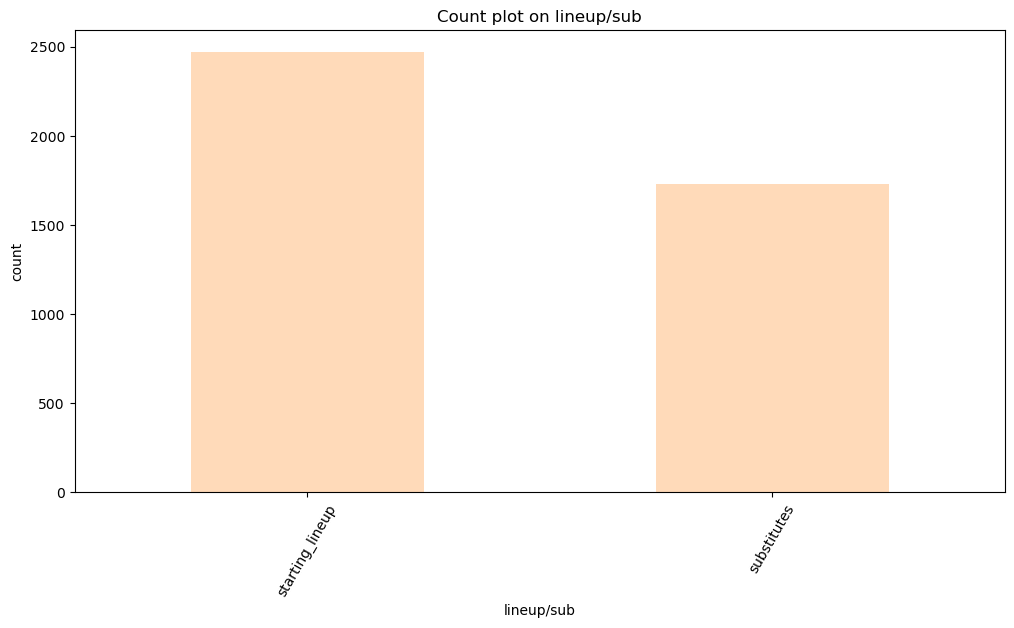

In [787]:
# Descriptive
descriptive('lineup/sub')

Unique values: 3
Maximum occuring: Substitutions
Top 7 occuring: event_type
Substitutions    2766
Goals            1330
Cards             105
Name: count, dtype: int64
-------


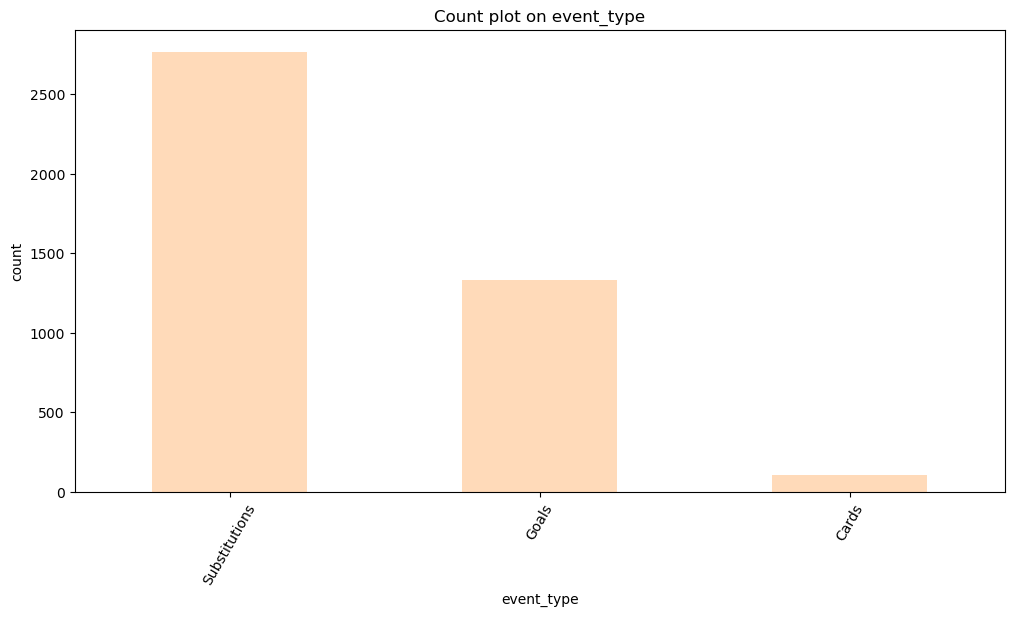

In [779]:
descriptive('event_type')

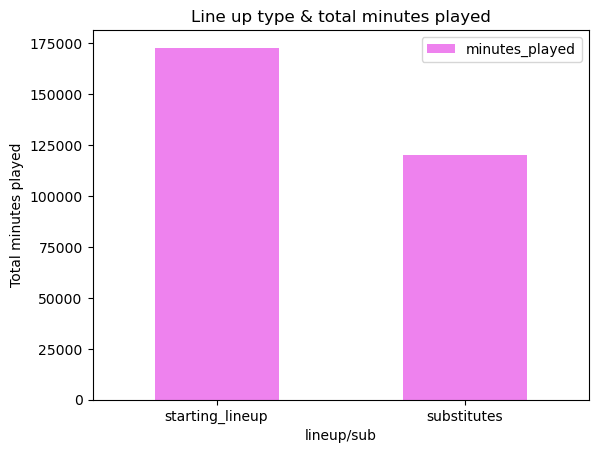

In [815]:
# Visualisation
df.groupby('lineup/sub')[['minutes_played']].sum().plot(kind='bar',color='violet')
plt.xticks(rotation=0)
plt.ylabel('Total minutes played')
plt.title('Line up type & total minutes played')
plt.show()

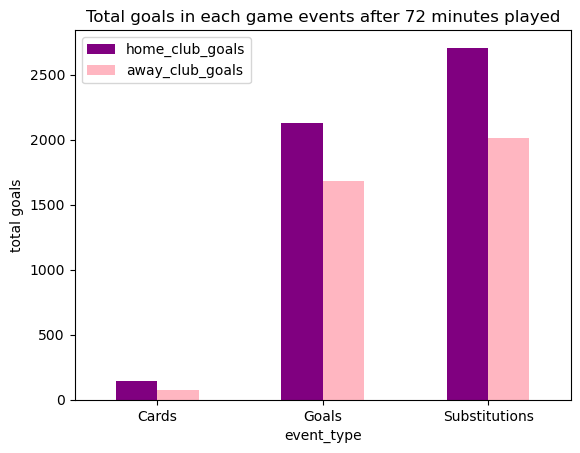

In [817]:
df[df['minutes_played']>=72].groupby('event_type')[['home_club_goals','away_club_goals']].sum().plot(kind='bar',stacked=False,color=['purple','lightpink'])
plt.xticks(rotation=0)
plt.ylabel('total goals')
plt.title('Total goals in each game events after 72 minutes played')
plt.show()

### 7. Event Analysis

Minimum: 1
Maximum: 120
Central Tendencies:
Mean: 69.72935015472507
Median: 77
Mode: 90
Measure of dispersion:
Range: 119
Inter quartile range: 31.0
Standard deviation: 22.692033797946017
Variance: 514.9283978871243
Skewness: -1.094023078445913
Kurtosis: 0.688340949954438
-----------


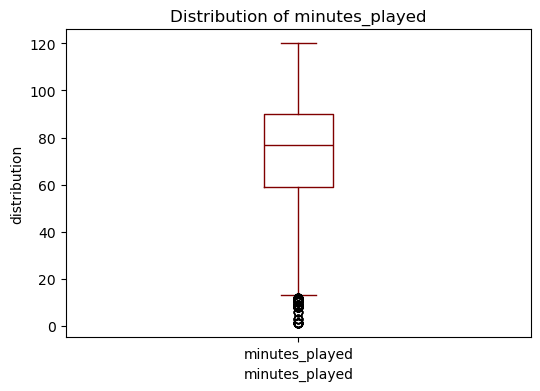

In [855]:
#Descriptive
descriptive('minutes_played')

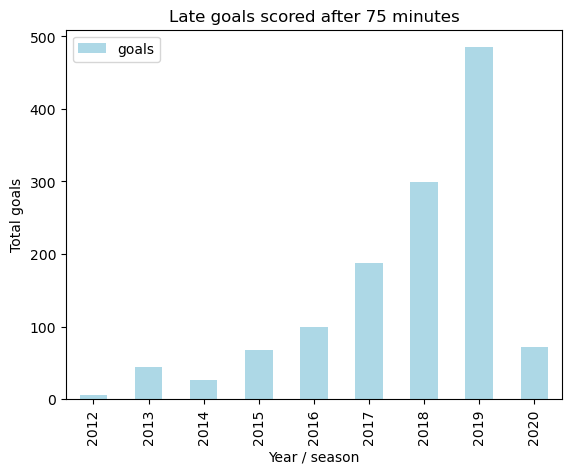

In [859]:
# Visualise
df[df['minutes_played']>=75].groupby('season')[['goals']].sum().plot(kind='bar',color='lightblue')
plt.xlabel('Year / season')
plt.ylabel('Total goals')
plt.title('Late goals scored after 75 minutes')
plt.show()

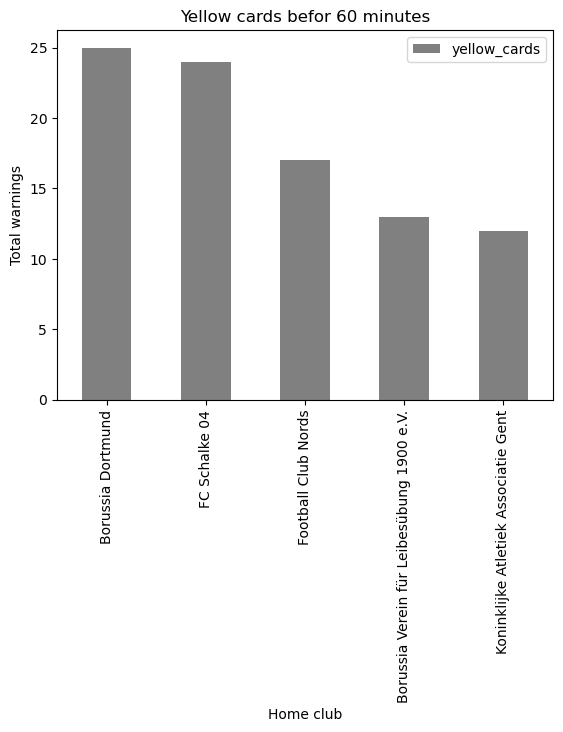

In [871]:
df[df['minutes_played']<=60].groupby('home_club_name')[['yellow_cards']].sum().sort_values('yellow_cards',ascending=False).head(5).plot(kind='bar',color='grey')
plt.xlabel('Home club')
plt.ylabel('Total warnings')
plt.title('Yellow cards befor 60 minutes')
plt.show()

#### Testing

In [291]:
# Population Mean
dt=df[df['competition_type']=='domestic_league']
dt['yellow_cards'].mean()

0.1738006320022982

In [293]:
# Population standard deviation
st.stdev(dt['yellow_cards'])

0.3789923943216057

In [ ]:
Set Hypothesis
H0: The average number of yellow cards drawn in domestic league is less than or equal to 0.174
H1: The average number of yellow cards drawn in domestic league is greater than 0.174
H0: mu<=0.174
H1: mu>0.174
One sided right tail test
Z test: since the sample size > 30 & standard deviation of population is given

In [273]:
# set alpha
alpha = 0.05
# set decision rule
# if p_value < alpha; -z_crit > z_stat > z_crit; Then reject Null hypothesis

In [299]:
trial1 = dt.sample(n=40,replace=True,random_state=1)
t1a_s_mean = st.mean(trial1['yellow_cards'])
print('Avergae yellow cards drawn in the sample:',t1a_s_mean)

Avergae yellow cards drawn in the sample: 0.125


In [301]:
# statiscal measures
t1a_s_mean = 0.125
t1a_p_mean = 0.174
t1a_p_std = 0.379
t1a_s_size = 40

In [303]:
z_statistics1 = (t1a_s_mean - t1a_p_mean)/(t1a_p_std/m.sqrt(t1a_s_size)) 
print('Z statistics:',z_statistics1)
p_value1 = norm.sf(abs(z_statistics1))
print('P value:',p_value1)
z_critical1 = norm.ppf(1-alpha)
print('Z critical value:',z_critical1)

Z statistics: -0.8176865717585781
P value: 0.206768090009199
Z critical value: 1.6448536269514722


In [ ]:
Statistical conclusion:
p_value 0.2067 > alpha 0.05
z critical 1.6448 < z statistics -0.8176
Accept Null hypothesis

Business conclusion:
The average number of yellow cards drawn in domestic league is lesser than or equal to 0.174

### 8.Competition analysis

In [ ]:
descriptive('competition_type')

In [825]:
event=df[['competition_type','goals','yellow_cards','red_cards']]
event['total_event']=event['goals']+event['yellow_cards']
event

,competition_type,goals,yellow_cards,red_cards,total_event
0,domestic_league,0,1,0,1
1,domestic_league,0,1,0,1
2,domestic_league,0,1,0,1
3,domestic_league,0,1,0,1
4,domestic_league,0,1,0,1
...,...,...,...,...,...
4196,domestic_league,0,0,0,0
4197,domestic_league,0,0,0,0
4198,domestic_league,0,0,0,0
0,domestic_league,0,0,0,0


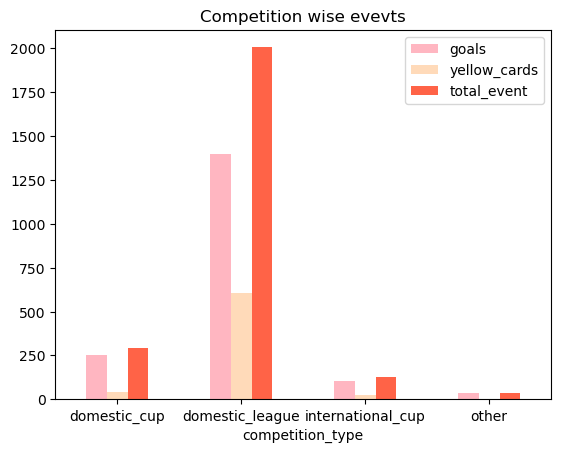

In [847]:
# Visualise
event.groupby('competition_type')[['goals','yellow_cards','total_event']].sum().plot(kind='bar',stacked=False,color=['lightpink','peachpuff','tomato'])
plt.xticks(rotation=0)
plt.title('Competition wise evevts')
plt.show()

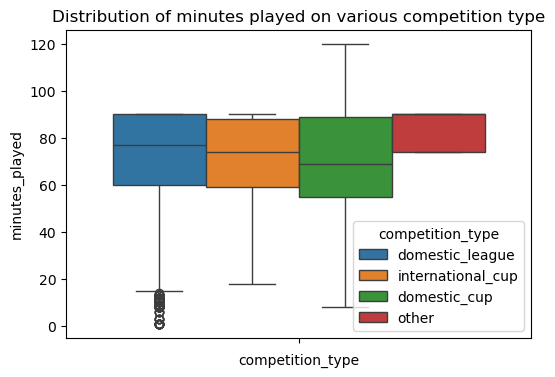

In [839]:
sns.boxplot(hue='competition_type',y='minutes_played',data=df)
plt.gcf().set_size_inches(6,4)
plt.xlabel('competition_type')
plt.title('Distribution of minutes played on various competition type')
plt.show()

### 9. Player Attributes & Demographics

Unique values: 5
Maximum occuring: United States
Top occuring: country_of_birth
United States    2791
Germany           767
Italy             484
England            84
Netherlands        75
Name: count, dtype: int64
-------


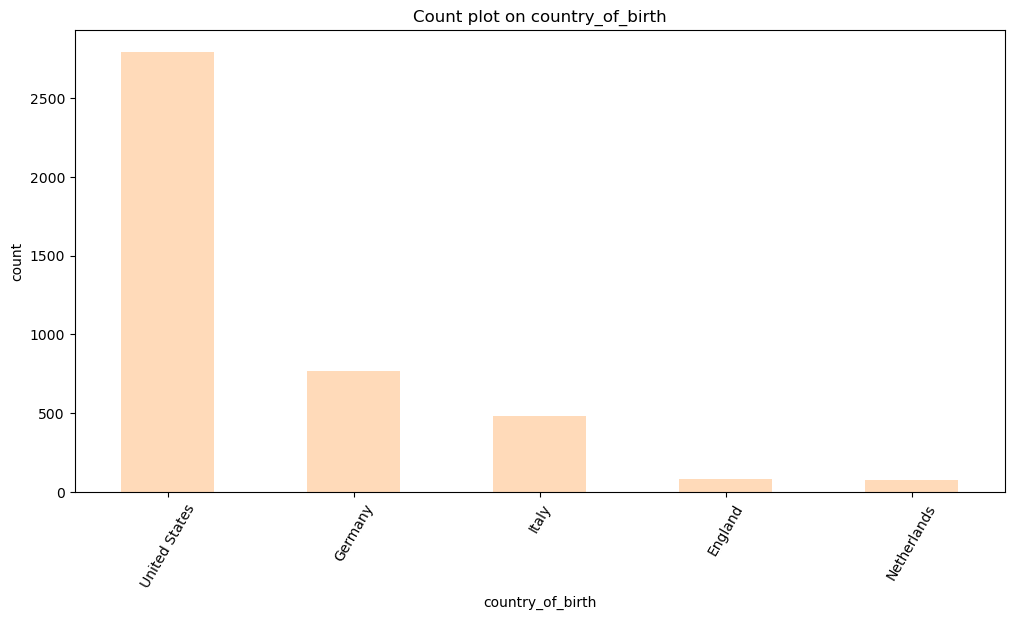

In [874]:
# descriptive
descriptive('country_of_birth')

Minimum: 171.0
Maximum: 194.0
Central Tendencies:
Mean: 181.82170911687695
Median: 178.0
Mode: 177.0
Measure of dispersion:
Range: 23.0
Inter quartile range: 9.0
Standard deviation: 6.419602793834285
Variance: 41.21130003060496
Skewness: 0.6326720083571556
Kurtosis: -0.8783879444536371
-----------


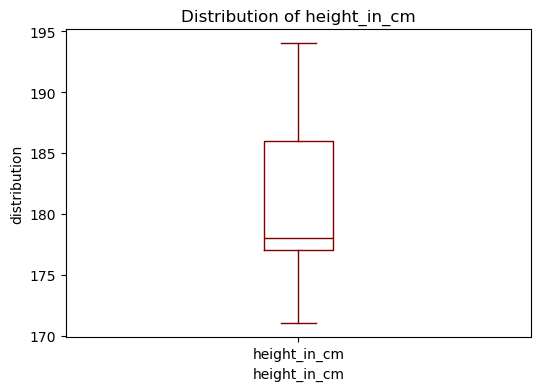

In [876]:
descriptive('height_in_cm')

Unique values: 3
Maximum occuring: right
Top occuring: foot
right    3427
left      669
both      105
Name: count, dtype: int64
-------


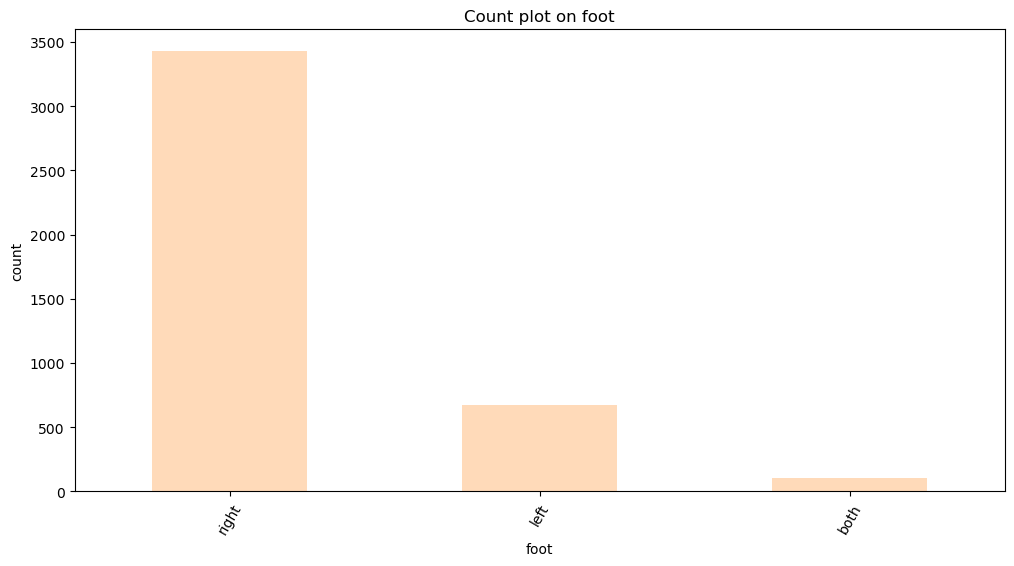

In [888]:
descriptive('foot')

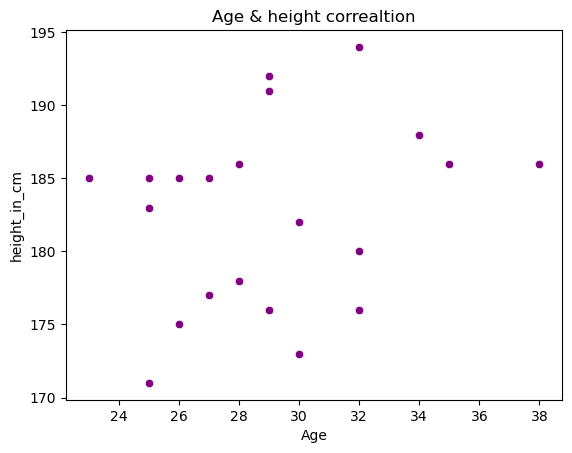

In [894]:
# Visualise
sns.scatterplot(data=df,y='height_in_cm',x='Age',color='purple')
plt.title('Age & height correaltion')
plt.show()

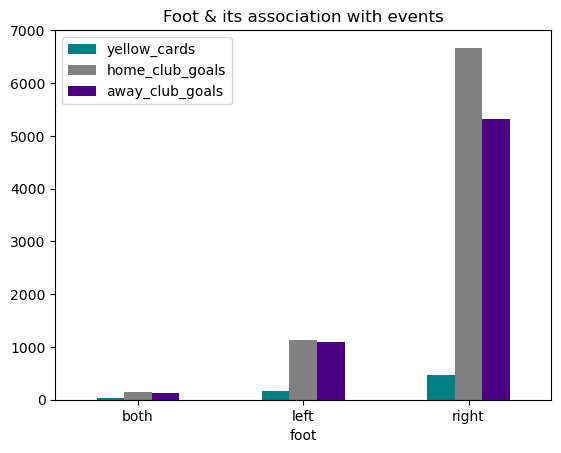

In [924]:
df.groupby('foot')[['yellow_cards','home_club_goals','away_club_goals']].sum().plot(kind='bar',color=['teal','grey','indigo'])
plt.xticks(rotation=0)
plt.title('Foot & its association with events')
plt.show()

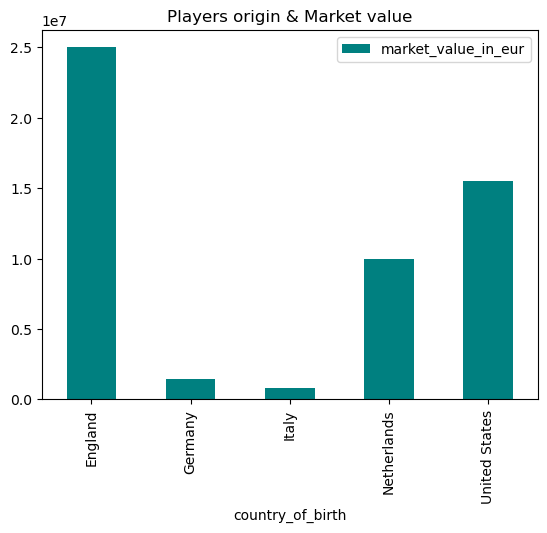

In [944]:
df.groupby('country_of_birth')[['market_value_in_eur']].mean().plot(kind='bar',stacked=False,color='teal')
plt.title('Players origin & Market value')
plt.show()

#### K Means clustering 

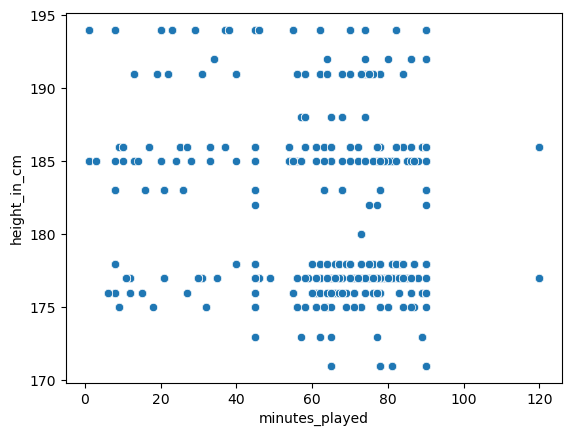

In [643]:
sns.scatterplot(data=df,y='height_in_cm',x='minutes_played')
plt.show()

In [645]:
cl=df[['minutes_played','height_in_cm']]
cls=KMeans(n_clusters=2).fit(cl)
cnt=cls.cluster_centers_
cnt

array([[ 80.59879861, 181.26304142],
       [ 36.60789981, 183.52408478]])

In [619]:
lbl=cls.labels_
lbl

array([1, 1, 1, ..., 1, 1, 1])

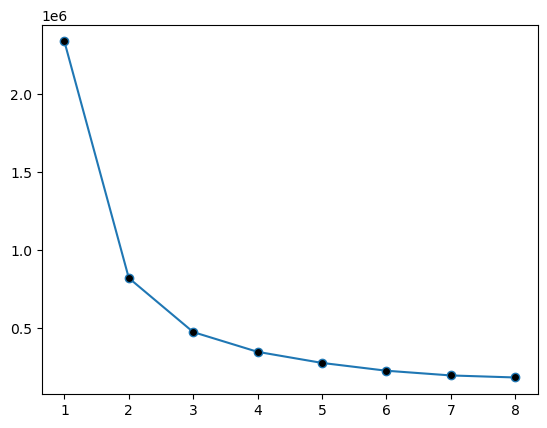

In [637]:
distortion=[]
for k in range(1,9):
    km_clstr=KMeans(n_clusters=k)
    km_clstr.fit(cl)
    distortion.append(km_clstr.inertia_)
plt.plot(range(1,9),distortion,marker='o',markerfacecolor='0')
plt.show()

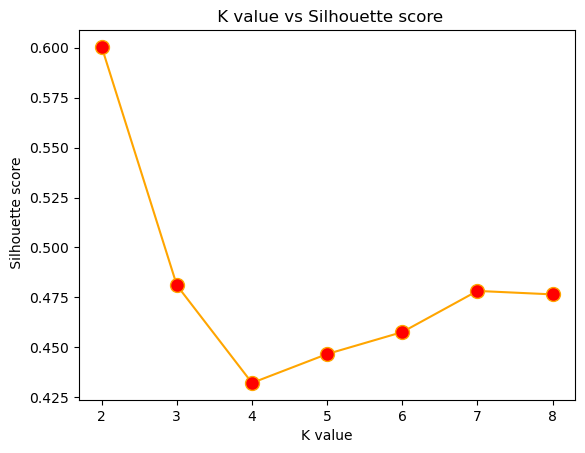

In [639]:
slht_score=[]
for n in range(2,9):
    slht_score.append(silhouette_score(cl,KMeans(n_clusters=n,random_state=0).fit_predict(cl)))
plt.plot(range(2,9),slht_score,color='orange',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K value')
plt.ylabel(' Silhouette score')
plt.title(' K value vs Silhouette score')
plt.show()

For n_cluster= 2 average silhouette score: 0.6003469953157033
For n_cluster= 3 average silhouette score: 0.481085436689238
For n_cluster= 4 average silhouette score: 0.4322407040356674
For n_cluster= 5 average silhouette score: 0.4467006575032179


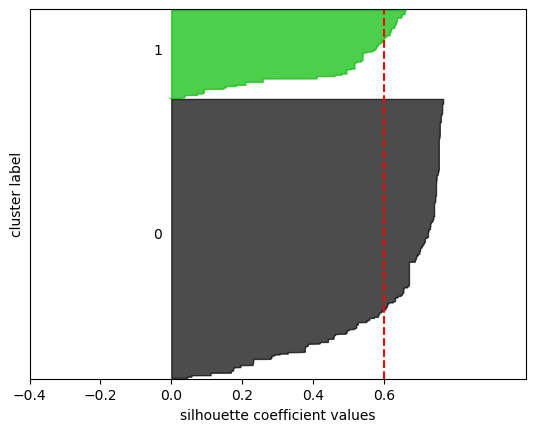

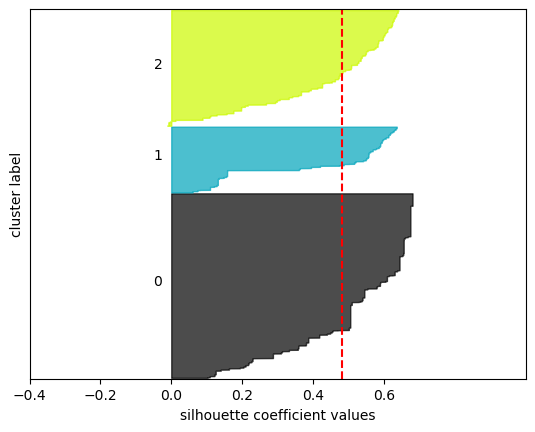

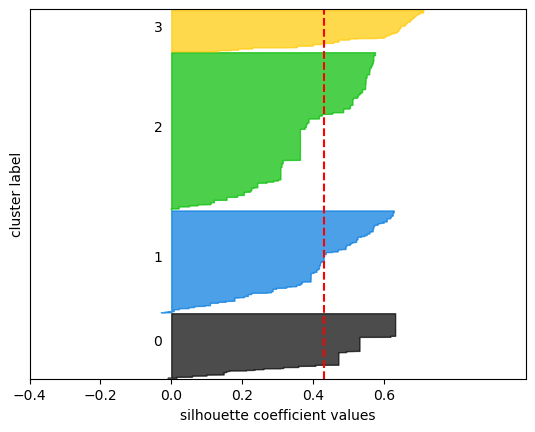

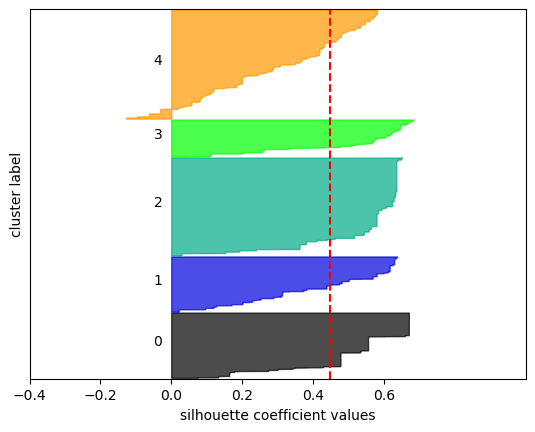

In [631]:
X=cl
range_n_clusters=[2,3,4,5]
for n_cluster in range_n_clusters:
    figure,ax1=plt.subplots(1,1)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(n_cluster+1)*10])
    cluster=KMeans(n_clusters=n_cluster,random_state=0)
    cluster_label=cluster.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_label)
    print('For n_cluster=',n_cluster,'average silhouette score:',silhouette_avg)
    # compute silhouette score for each sample
    sample_silht_values=silhouette_samples(X,cluster_label)
    y_lower=10
    for i in range(n_cluster):
        ith_cluster_silht_values=sample_silht_values[cluster_label==i]
        ith_cluster_silht_values=np.sort(ith_cluster_silht_values)
        size_cluster_i=ith_cluster_silht_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_cluster)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silht_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        # compute the new y_lower for next plot
        y_lower=y_upper+10
    ax1.set_xlabel('silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    # vertical line for avg slht score for all values
    ax1.axvline(x=silhouette_avg,c='r',ls='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.4,-0.2,0,0.2,0.4,0.6])
plt.show()

In [663]:
k=2
kmean_mod=KMeans(n_clusters=k,random_state=0)
kmean_mod.fit(cl)
kmean_cntrd=kmean_mod.cluster_centers_
kmean_cntrd

array([[ 80.37946149, 181.21102066],
       [ 35.94935452, 183.75868918]])

In [675]:
label=kmean_mod.labels_
label

array([0, 0, 0, ..., 0, 0, 0])

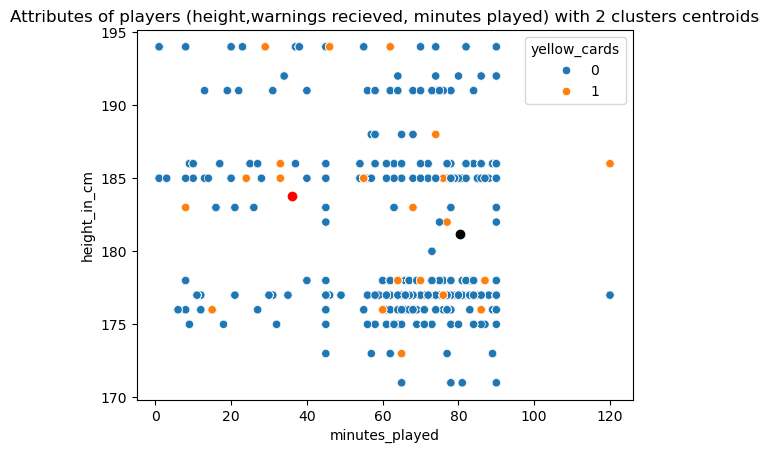

In [673]:
sns.scatterplot(data=df,y='height_in_cm',x='minutes_played',hue='yellow_cards')
plt.scatter(80.37946149, 181.21102066,color='black')
plt.scatter(35.94935452, 183.75868918,color='red')
plt.title('Attributes of players (height,warnings recieved, minutes played) with 2 clusters centroids')
plt.show()

In [677]:
ch_index=calinski_harabasz_score(cl,KMeans(n_clusters=k).fit(cl).labels_)
ch_index

7770.968107327033

In [679]:
db_index=davies_bouldin_score(cl,KMeans(n_clusters=k).fit(cl).labels_)
db_index

0.6168564480526433

In [681]:
silht_score=silhouette_score(cl,KMeans(n_clusters=k).fit(cl).labels_)
silht_score

0.5972546661667147

#### summary

### 10. Contract Management

Minimum: 23
Maximum: 38
Central Tendencies:
Mean: 28.519400142823137
Median: 27
Mode: 27
Measure of dispersion:
Range: 15
Inter quartile range: 2.0
Standard deviation: 3.020275487606731
Variance: 9.122064021038074
Skewness: 1.1549615042452481
Kurtosis: 0.8065939652352703
-----------


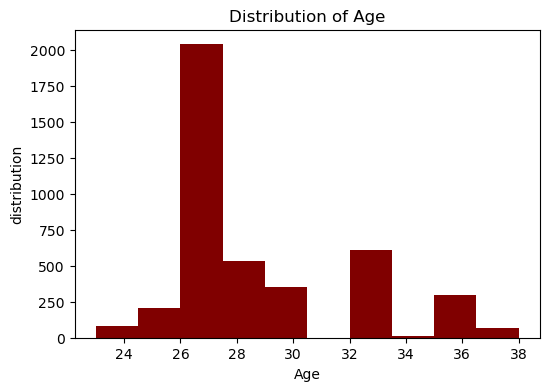

In [886]:
descriptive('Age','hist')

Minimum: 300000.0
Maximum: 25000000.0
Central Tendencies:
Mean: 11338098.641887061
Median: 7000000.0
Mode: 25000000.0
Measure of dispersion:
Range: 24700000.0
Inter quartile range: 24200000.0
Standard deviation: 10884912.975428773
Variance: 118481330482657.69
Skewness: 0.26629978536252064
Kurtosis: -1.7792225497917031
-----------


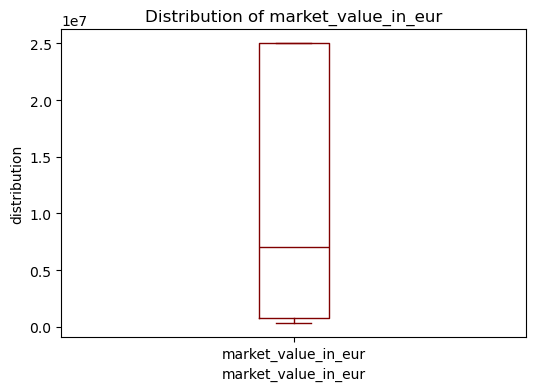

In [884]:
descriptive('market_value_in_eur')

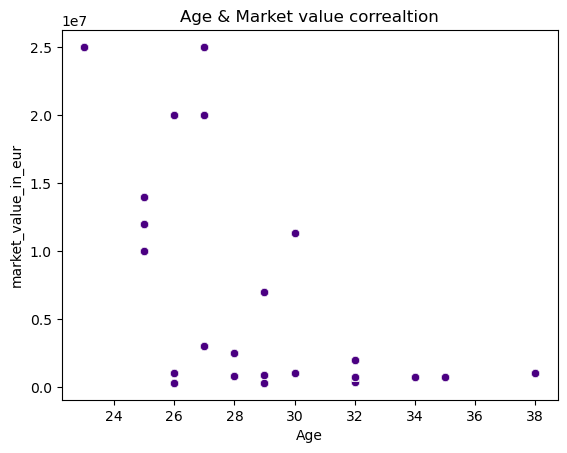

In [898]:
# Visualise
sns.scatterplot(data=df,y='market_value_in_eur',x='Age',color='indigo')
plt.title('Age & Market value correaltion')
plt.show()

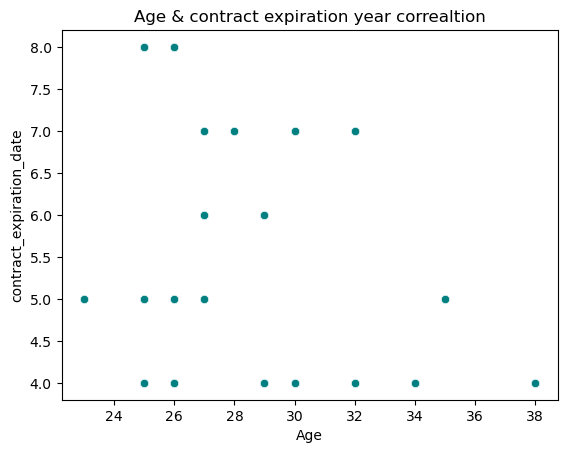

In [914]:
# Visualise
sns.scatterplot(y=(df['contract_expiration_date'].dt.year)-2020,x=df['Age'],color='teal')
plt.title('Age & contract expiration year correaltion')
plt.show()

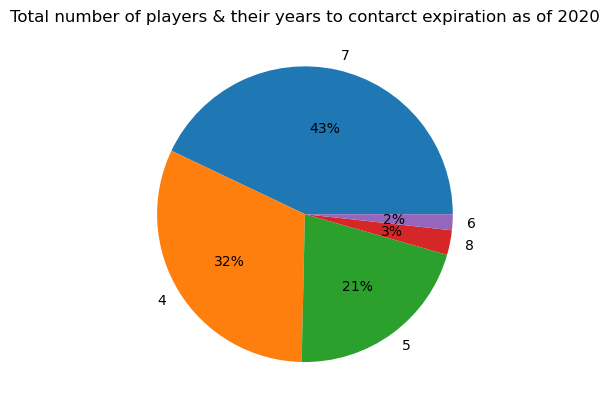

In [916]:
y=(df['contract_expiration_date'].dt.year)-2020
p5=y.value_counts()
plt.pie(p5.values,labels=p5.index,autopct='%.f%%')
plt.title('Total number of players & their years to contarct expiration as of 2020')
plt.show()

### Conclusion